<a href="https://colab.research.google.com/github/moniquebritto21/Firend-zone-/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1684]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt

### Reading and Cleaning oil_gas_dataset

In [1685]:
oil_df=pd.read_csv("oil_gas_dataset.csv")

In [1686]:
oil_df.head()

,Symbol,Date,Open,High,Low,Close,Volume,Currency
0,Brent Oil,2000-01-04,23.90,24.70,23.89,24.39,32509,USD
1,Brent Oil,2000-01-05,24.25,24.37,23.70,23.73,30310,USD
2,Brent Oil,2000-01-06,23.55,24.22,23.35,23.62,44662,USD
3,Brent Oil,2000-01-07,23.57,23.98,23.05,23.09,34826,USD
4,Brent Oil,2000-01-10,23.04,23.78,23.04,23.73,26388,USD


In [1687]:
oil_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23024 entries, 0 to 23023
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Symbol    23024 non-null  object 
 1   Date      23024 non-null  object 
 2   Open      23024 non-null  float64
 3   High      23024 non-null  float64
 4   Low       23024 non-null  float64
 5   Close     23024 non-null  float64
 6   Volume    23024 non-null  int64  
 7   Currency  23024 non-null  object 
dtypes: float64(4), int64(1), object(3)
memory usage: 1.4+ MB


Preprocessing decisions
- convert date to DateTime
- drop high, low and volume since our analysis does not require such details
- drop currency column since all the values are identical
- split into brent oil, crude oil and natural gas datasets

In [1688]:
#convert date column to datetime
oil_df['Date'] = pd.to_datetime(oil_df['Date'], format='%Y-%m-%d')


In [1689]:
#drop non-essential columns
oil_df=oil_df.drop(columns=['High','Low','Volume','Currency'])

In [1690]:
oil_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23024 entries, 0 to 23023
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Symbol  23024 non-null  object        
 1   Date    23024 non-null  datetime64[ns]
 2   Open    23024 non-null  float64       
 3   Close   23024 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 719.6+ KB


In [1691]:
oil_df['Symbol'].value_counts()

Symbol
Heating Oil      5770
Brent Oil        5768
Crude Oil WTI    5744
Natural Gas      5742
Name: count, dtype: int64

In [1692]:
#split into separate dfs for oil and gas
brent_oil_df=oil_df[oil_df['Symbol']=='Brent Oil']
crude_oil_df=oil_df[oil_df['Symbol']=='Crude Oil WTI']
natural_gas_df=oil_df[oil_df['Symbol']=='Natural Gas']
heating_oil_df=oil_df[oil_df['Symbol']=='Heating Oil']

In [1693]:
brent_oil_df

,Symbol,Date,Open,Close
0,Brent Oil,2000-01-04,23.90,24.39
1,Brent Oil,2000-01-05,24.25,23.73
2,Brent Oil,2000-01-06,23.55,23.62
3,Brent Oil,2000-01-07,23.57,23.09
4,Brent Oil,2000-01-10,23.04,23.73
...,...,...,...,...
5763,Brent Oil,2022-06-13,121.94,122.27
5764,Brent Oil,2022-06-14,121.88,121.17
5765,Brent Oil,2022-06-15,120.79,118.51
5766,Brent Oil,2022-06-16,119.65,119.81


In [1694]:
crude_oil_df

,Symbol,Date,Open,Close
5768,Crude Oil WTI,2000-01-04,25.20,25.55
5769,Crude Oil WTI,2000-01-05,25.50,24.91
5770,Crude Oil WTI,2000-01-06,24.80,24.78
5771,Crude Oil WTI,2000-01-07,24.65,24.22
5772,Crude Oil WTI,2000-01-10,24.22,24.67
...,...,...,...,...
11507,Crude Oil WTI,2022-06-13,120.19,120.93
11508,Crude Oil WTI,2022-06-14,121.09,118.93
11509,Crude Oil WTI,2022-06-15,119.07,115.31
11510,Crude Oil WTI,2022-06-16,115.98,117.59


In [1695]:
natural_gas_df

,Symbol,Date,Open,Close
11512,Natural Gas,2000-01-04,2.130,2.176
11513,Natural Gas,2000-01-05,2.180,2.168
11514,Natural Gas,2000-01-06,2.165,2.196
11515,Natural Gas,2000-01-07,2.195,2.173
11516,Natural Gas,2000-01-10,2.180,2.216
...,...,...,...,...
17249,Natural Gas,2022-06-13,8.920,8.609
17250,Natural Gas,2022-06-14,8.686,7.189
17251,Natural Gas,2022-06-15,7.269,7.420
17252,Natural Gas,2022-06-16,7.540,7.464


In [1696]:
heating_oil_df

,Symbol,Date,Open,Close
17254,Heating Oil,2000-01-04,0.6720,0.6778
17255,Heating Oil,2000-01-05,0.6790,0.6655
17256,Heating Oil,2000-01-06,0.6645,0.6628
17257,Heating Oil,2000-01-07,0.6600,0.6475
17258,Heating Oil,2000-01-10,0.6445,0.6472
...,...,...,...,...
23019,Heating Oil,2022-06-13,4.3612,4.2834
23020,Heating Oil,2022-06-14,4.2749,4.3940
23021,Heating Oil,2022-06-15,4.3816,4.5470
23022,Heating Oil,2022-06-16,4.5320,4.5713


### Reading and Cleaning sectoral_gdp dataset

In [1697]:
gdp_df=pd.read_csv("sectoral_gdp.csv")

In [1698]:
gdp_df.head()

,Quarter/Year,Unnamed: 1,2012-1,2012-2,2012-3,2012-4,2013-1,2013-2,2013-3,2013-4,...,2021-1,2021-2,2021-3,2021-4,2022-1,2022-2,2022-3,2022-4,2023-1,2023-2
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Industry,ISIC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Agriculture, forestry and fishing",A,289.5,282.1,284.0,287.5,279.9,270.3,269.8,271.5,...,256.4,238.6,219.5,218.7,204.5,208.5,196.3,204.7,196.2,205.2
3,Mining and quarrying,B,"9,212.6","8,893.6","8,773.2","8,486.3","9,024.4","9,047.8","9,031.8","8,871.1",...,"5,901.5","5,708.6","5,589.9","5,669.7","5,573.5","5,683.4","6,079.8","5,670.9","5,630.0","5,572.6"
4,Manufacturing,C,"7,888.0","7,847.7","7,768.4","7,030.1","7,692.1","7,710.2","7,516.2","7,537.2",...,"5,980.1","6,066.7","6,100.6","6,169.4","6,308.3","6,324.1","6,572.4","6,419.2","6,189.8","6,276.9"


In [1699]:
gdp_df=gdp_df.transpose()

In [1700]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48 entries, Quarter/Year to 2023-2
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       0 non-null      object
 1   1       2 non-null      object
 2   2       48 non-null     object
 3   3       48 non-null     object
 4   4       48 non-null     object
 5   5       1 non-null      object
 6   6       48 non-null     object
 7   7       48 non-null     object
 8   8       48 non-null     object
 9   9       48 non-null     object
 10  10      48 non-null     object
 11  11      48 non-null     object
 12  12      48 non-null     object
 13  13      48 non-null     object
 14  14      48 non-null     object
 15  15      48 non-null     object
 16  16      48 non-null     object
 17  17      48 non-null     object
 18  18      48 non-null     object
 19  19      1 non-null      object
 20  20      48 non-null     object
 21  21      48 non-null     object
 22  22      48 non-nul

In [1701]:
gdp_df.head()

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
Quarter/Year,NaN,Industry,"Agriculture, forestry and fishing",Mining and quarrying,Manufacturing,Of which:,"Food, beverages and tobacco products","Textiles, clothing, leather, wood, paper and p...",Petroleum and chemical products,Other manufactured products,...,Of which,Crude Oil Exploration & Extraction,Condensate Extraction,Natural Gas Exploration & Extraction,Asphalt,Petroleum support services,Refining (incl. LNG),Manufacture of Petrochemicals,Petroleum and natural gas distribution,Source: Central Statistical Office
Unnamed: 1,NaN,ISIC,A,B,C,NaN,CA,CB-C,CD-E,CF-M,...,NaN,B1,B2,B3,B4,B5,C1,C2,G1,NaN
2012-1,NaN,NaN,289.5,"9,212.6","7,888.0",NaN,"1,199.1",231.6,"5,959.2",498.1,...,NaN,"3,027.1","1,344.6","4,074.5",55.2,679.2,"2,638.6","3,091.3","1,290.3",NaN
2012-2,NaN,NaN,282.1,"8,893.6","7,847.7",NaN,"1,200.2",280.6,"5,811.6",555.3,...,NaN,"3,182.4","1,100.6","3,924.4",55.2,630.4,"2,607.8","3,027.3","1,297.9",NaN
2012-3,NaN,NaN,284.0,"8,773.2","7,768.4",NaN,"1,227.5",263.9,"5,744.2",532.8,...,NaN,"3,188.1",970.9,"4,083.1",55.2,447.1,"2,611.7","2,932.7","1,283.5",NaN


Preprocessing decisions are based on the following observations
- The first row of this dataset contains industry labels.
- The second row is a code for each industry.
- There are many NaN columns (0,1,5,19,31,40).
- Multi-letter codes (row 2) contain a combination of industry products. Our research focuses on the contribution of individual sectors. Thus these rows are not needed.

In [1702]:
gdp_clean=gdp_df.copy()

In [1703]:
#extract dates column
dates=pd.DataFrame(gdp_clean[0])
dates.info()
print(dates.head())
print(dates.iloc[5])


<class 'pandas.core.frame.DataFrame'>
Index: 48 entries, Quarter/Year to 2023-2
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       0 non-null      object
dtypes: object(1)
memory usage: 1.8+ KB
                0
Quarter/Year  NaN
Unnamed: 1    NaN
2012-1        NaN
2012-2        NaN
2012-3        NaN
0    NaN
Name: 2012-4, dtype: object


In [1704]:
#clean dates data
years=[]
quarters=[]
for i in range(2,len(dates)):
    date=dates.iloc[i].name

    #convert to string and remove trailing whitespace
    date=str(date).strip()

    #split into year and quarter
    year, quarter = date.split("-")
    years.append(int(year))
    quarters.append(int(quarter))

dates_df=pd.DataFrame({'Year':years, 'Quarter':quarters})
dates_df.head()


,Year,Quarter
0,2012,1
1,2012,2
2,2012,3
3,2012,4
4,2013,1


In [1705]:
# set column names to industry
gdp_clean.columns=gdp_clean.iloc[0]
gdp_clean=gdp_clean[1:]



In [1706]:
#extract and clean total gdp column
total_gdp=gdp_clean['GDP at basic prices']
values=[]

for val in total_gdp[1:]:   #exclude nan in first row
    amount=float(val.replace(",",""))
    values.append(amount)

total_gdp_df=pd.DataFrame({'Total GDP':values})
total_gdp_df.head()

,Total GDP
0,41793.4
1,42040.3
2,42450.8
3,41692.8
4,42009.3


In [1707]:
#extract and clean industry columns
industries=[]
values=[]
for col in gdp_clean.columns:
    data=gdp_clean[col].iloc[0]
    data=str(data).strip()
    if len(data)==1:
        industries.append(col)

industries_df=pd.DataFrame(gdp_clean[industries][1:])


industries_df = industries_df.reset_index(drop=True)
industries_df


Quarter/Year,"Agriculture, forestry and fishing",Mining and quarrying,Manufacturing,Electricity and gas,Water supply and sewerage,Construction,Trade and repairs,Transport and storage,Accommodation and food services,Information and communication,Financial and insurance activities,Real estate activities,"Professional, scientific and technical services",Administrative and support services,Public administration,Education,Human health and social work,"Arts, entertainment and recreation",Other service activities,Domestic services
0,289.5,"9,212.6","7,888.0","1,309.3",512.3,"2,155.9","9,179.4","1,314.3",563.6,945.3,"2,333.3",753.3,604.0,779.6,"2,687.4",903.4,147.4,94.4,80.5,39.8
1,282.1,"8,893.6","7,847.7","1,299.3",509.3,"2,199.7","9,855.2","1,316.1",523.3,956.9,"2,304.2",754.7,544.2,801.2,"2,682.8",905.4,147.1,94.1,83.2,40.0
2,284.0,"8,773.2","7,768.4","1,327.9",513.2,"2,216.4","10,018.6","1,501.2",546.6,974.9,"2,329.7",756.6,602.5,856.3,"2,701.3",914.3,147.9,94.7,82.9,40.1
3,287.5,"8,486.3","7,030.1","1,229.4",522.3,"2,037.7","10,746.8","1,234.4",506.4,981.3,"2,360.5",757.4,619.1,921.5,"2,686.9",917.6,147.7,94.5,85.4,40.3
4,279.9,"9,024.4","7,692.1","1,329.9",485.1,"2,246.7","9,442.0","1,455.2",555.3,978.9,"2,339.3",760.1,446.9,"1,020.8","2,658.4",924.4,148.0,94.7,87.0,40.4
5,270.3,"9,047.8","7,710.2","1,308.6",493.5,"2,383.2","9,883.0","1,331.6",544.9,986.0,"2,145.8",760.9,647.5,"1,076.0","2,673.1",926.1,148.4,95.0,84.5,40.5
6,269.8,"9,031.8","7,516.2","1,296.0",511.6,"2,241.9","10,722.2","1,544.6",558.0,"1,002.8","2,174.6",772.3,683.5,"1,090.1","2,688.7",934.9,148.5,95.0,84.3,40.7
7,271.5,"8,871.1","7,537.2","1,350.7",500.8,"2,237.0","12,896.0","1,612.0",522.6,"1,030.6","2,174.3",769.1,712.7,"1,051.5","2,748.0",938.3,148.6,95.1,87.0,40.8
8,256.5,"8,787.9","7,451.5","1,374.4",473.2,"2,305.2","11,239.8","1,438.1",520.9,"1,003.8","2,203.9",772.2,698.5,973.3,"2,737.0",945.4,148.6,95.1,85.5,40.9
9,256.1,"8,776.8","7,495.6","1,292.5",450.1,"2,239.0","12,385.1","1,439.9",531.5,"1,020.1","2,226.9",775.3,668.4,929.2,"2,770.8",949.9,148.9,95.3,85.1,41.1


In [1708]:
#remove commas and spaces from currency data
for row in range(0,len(industries_df)):
    for col in range(0,len(industries_df.columns)):
        value=industries_df.iloc[row,col].strip()
        cleaned=value.replace(",","")
        industries_df.iloc[row,col]=cleaned



In [1709]:
industries_df.head()

Quarter/Year,"Agriculture, forestry and fishing",Mining and quarrying,Manufacturing,Electricity and gas,Water supply and sewerage,Construction,Trade and repairs,Transport and storage,Accommodation and food services,Information and communication,Financial and insurance activities,Real estate activities,"Professional, scientific and technical services",Administrative and support services,Public administration,Education,Human health and social work,"Arts, entertainment and recreation",Other service activities,Domestic services
0,289.5,9212.6,7888.0,1309.3,512.3,2155.9,9179.4,1314.3,563.6,945.3,2333.3,753.3,604.0,779.6,2687.4,903.4,147.4,94.4,80.5,39.8
1,282.1,8893.6,7847.7,1299.3,509.3,2199.7,9855.2,1316.1,523.3,956.9,2304.2,754.7,544.2,801.2,2682.8,905.4,147.1,94.1,83.2,40.0
2,284.0,8773.2,7768.4,1327.9,513.2,2216.4,10018.6,1501.2,546.6,974.9,2329.7,756.6,602.5,856.3,2701.3,914.3,147.9,94.7,82.9,40.1
3,287.5,8486.3,7030.1,1229.4,522.3,2037.7,10746.8,1234.4,506.4,981.3,2360.5,757.4,619.1,921.5,2686.9,917.6,147.7,94.5,85.4,40.3
4,279.9,9024.4,7692.1,1329.9,485.1,2246.7,9442.0,1455.2,555.3,978.9,2339.3,760.1,446.9,1020.8,2658.4,924.4,148.0,94.7,87.0,40.4


In [1710]:
#convert df to float
industries_df=industries_df.astype(float)
industries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 20 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Agriculture, forestry and fishing                46 non-null     float64
 1   Mining and quarrying                             46 non-null     float64
 2   Manufacturing                                    46 non-null     float64
 3   Electricity and gas                              46 non-null     float64
 4   Water supply and sewerage                        46 non-null     float64
 5   Construction                                     46 non-null     float64
 6   Trade and repairs                                46 non-null     float64
 7   Transport and storage                            46 non-null     float64
 8   Accommodation and food services                  46 non-null     float64
 9   Information and communication     

In [1711]:
#combine date(year/quarter), industry values, totals
gdp_clean=pd.concat([dates_df,industries_df,total_gdp_df], axis=1)
gdp_clean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 23 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Year                                             46 non-null     int64  
 1   Quarter                                          46 non-null     int64  
 2   Agriculture, forestry and fishing                46 non-null     float64
 3   Mining and quarrying                             46 non-null     float64
 4   Manufacturing                                    46 non-null     float64
 5   Electricity and gas                              46 non-null     float64
 6   Water supply and sewerage                        46 non-null     float64
 7   Construction                                     46 non-null     float64
 8   Trade and repairs                                46 non-null     float64
 9   Transport and storage             

The cleaned datasets are as follows
- Oil and Gas: brent_oil_df, crude_oil_df, natural_gas_df
- Sectoral GDP: gdp_clean

# Visualization

In [1712]:
import seaborn as sns
from sklearn.metrics import mean_squared_error
from math import sqrt

### Bar Chart Showing Q1 and Q4 for 2012

In [1713]:
filtered_df_2012 = gdp_clean[gdp_clean['Year'] == 2012]
filtered_df_2012 = filtered_df_2012.drop(columns = ['Total GDP', 'Year'])
filtered_df_2012_Q1 = filtered_df_2012[filtered_df_2012['Quarter'] == 1]
filtered_df_2012_Q4 = filtered_df_2012[filtered_df_2012['Quarter'] == 4]

In [1714]:
columns_to_plot = ['Agriculture, forestry and fishing',
       'Mining and quarrying', 'Manufacturing', 'Electricity and gas',
       'Water supply and sewerage', 'Construction', 'Trade and repairs',
       'Transport and storage', 'Accommodation and food services',
       'Information and communication', 'Financial and insurance activities',
       'Real estate activities',
       'Professional, scientific and technical services',
       'Administrative and support services', 'Public administration',
       'Education', 'Human health and social work',
       'Arts, entertainment and recreation', 'Other service activities',
       'Domestic services']


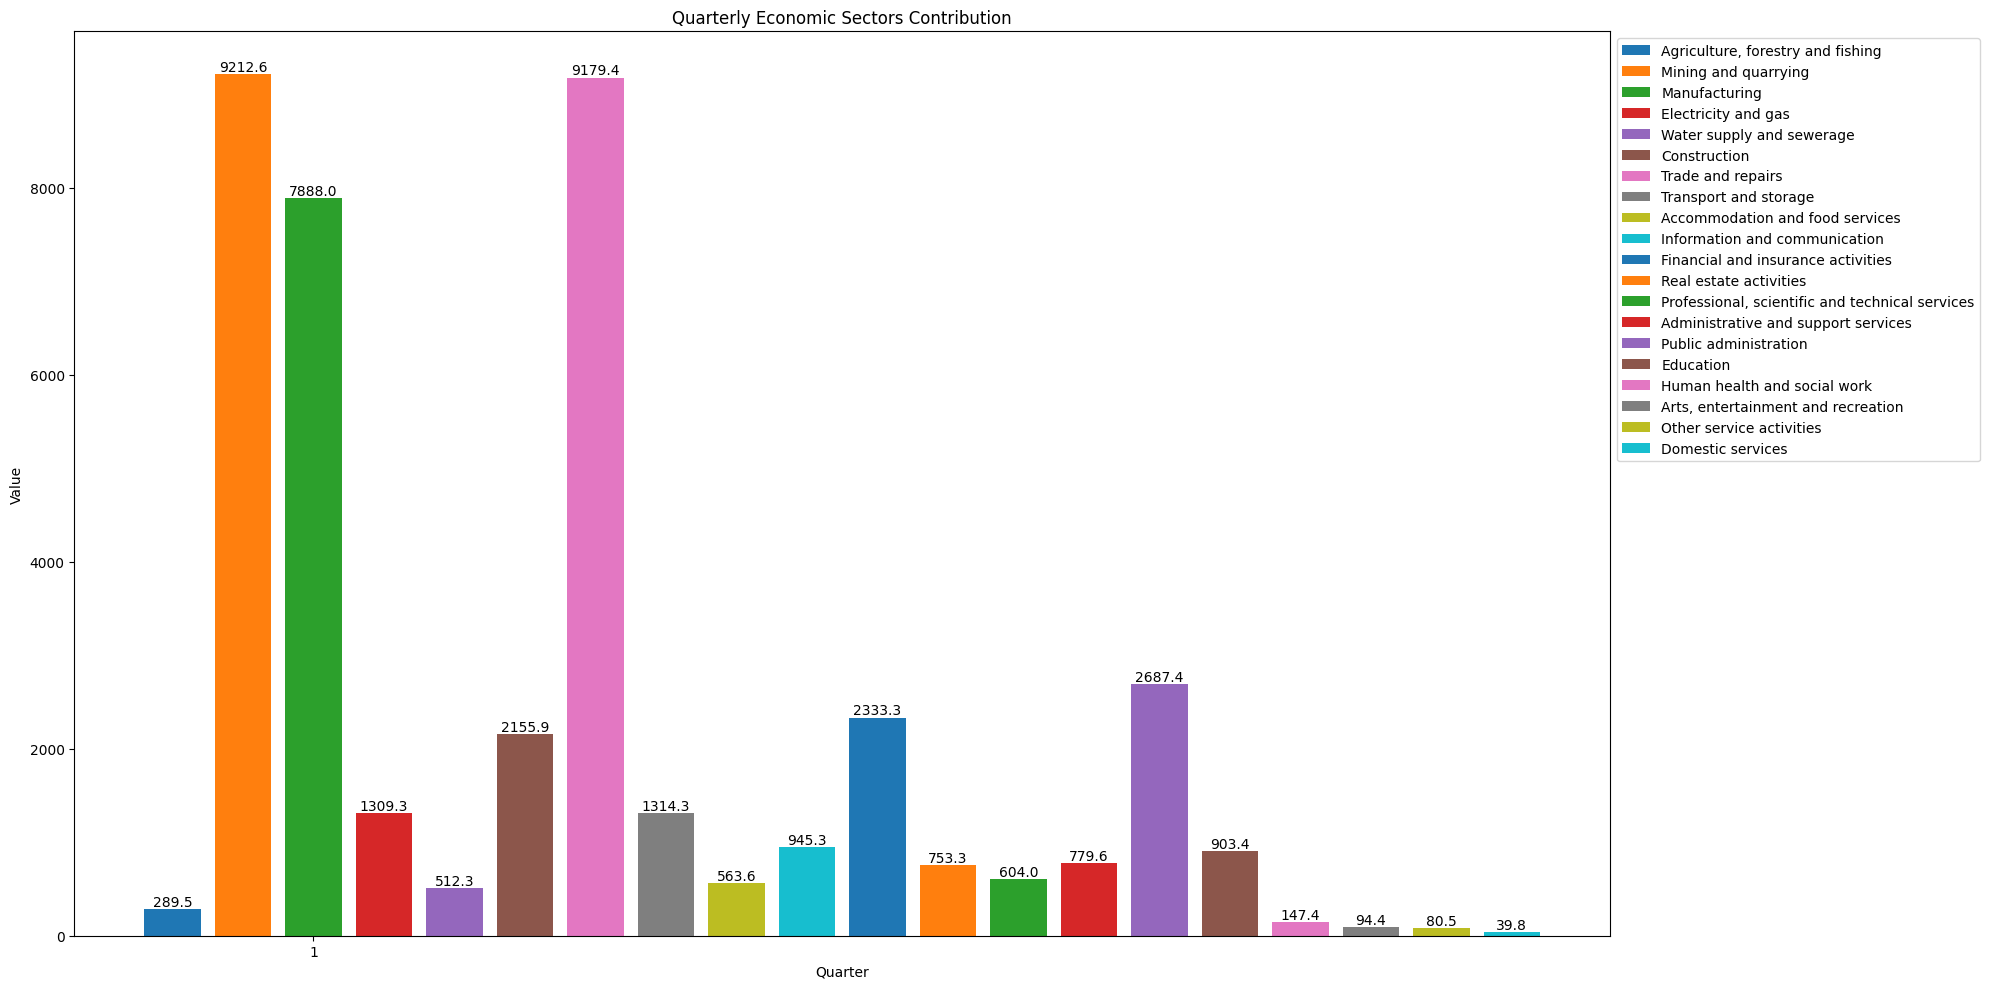

In [1715]:
plt.figure(figsize=(20, 10))

# Plot bars
for column in columns_to_plot:
    plt.bar(filtered_df_2012_Q1['Quarter'] + (columns_to_plot.index(column) - 2) * 0.15, filtered_df_2012_Q1[column], width=0.12, label=column)

    # Add value labels on top of bars
    for i, value in enumerate(filtered_df_2012_Q1[column]):
        plt.text(filtered_df_2012_Q1['Quarter'][i] + (columns_to_plot.index(column) - 2) * 0.15, value + 1, f'{value}', ha='center', va='bottom')

plt.xlabel('Quarter')
plt.ylabel('Value')
plt.title('Quarterly Economic Sectors Contribution')
plt.xticks(filtered_df_2012_Q1['Quarter'])
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.tight_layout()
plt.show()

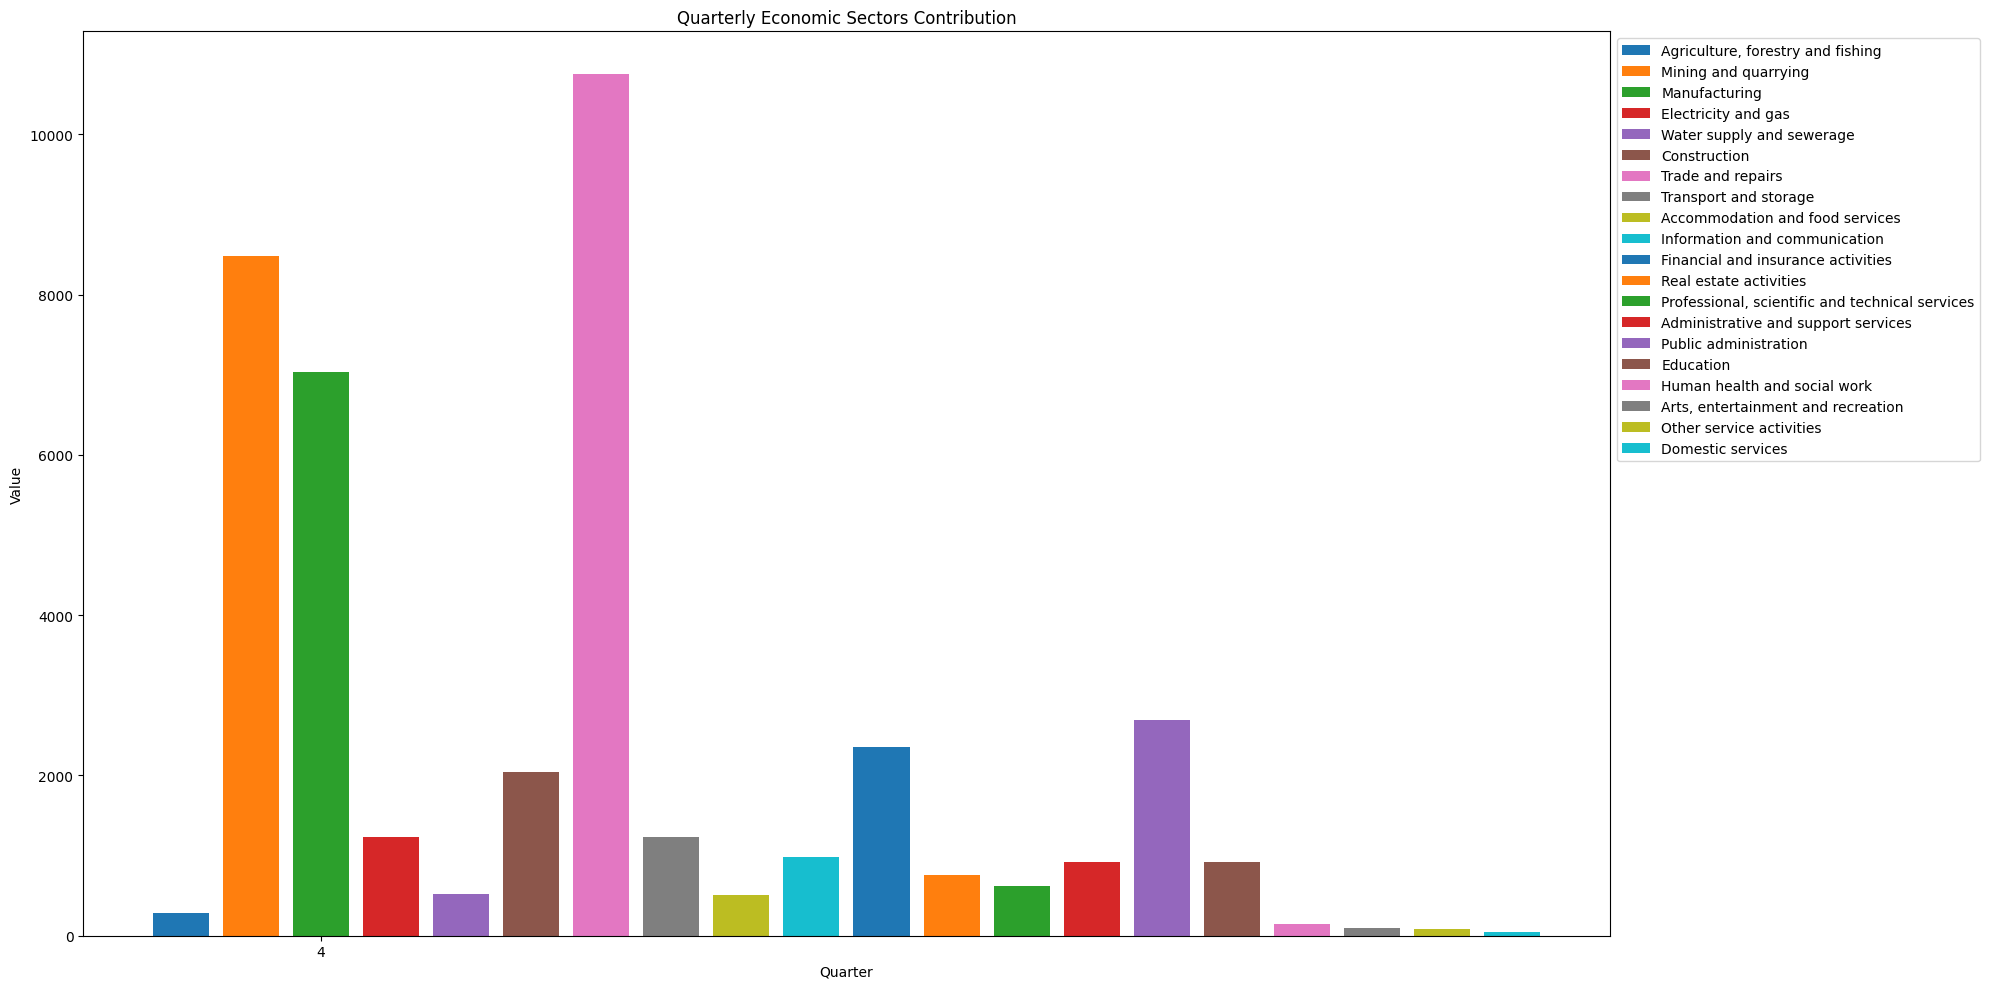

In [1716]:
plt.figure(figsize=(20, 10))
# Plot bars
for column in columns_to_plot:
    plt.bar(filtered_df_2012_Q4['Quarter'] + (columns_to_plot.index(column) - 2) * 0.15, filtered_df_2012_Q4[column], width=0.12, label=column)

plt.xlabel('Quarter')
plt.ylabel('Value')
plt.title('Quarterly Economic Sectors Contribution')
plt.xticks(filtered_df_2012_Q4['Quarter'])
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.tight_layout()
plt.show()

### Bar Chart Showing Q1 and Q4 for 2022

In [1717]:
filtered_df_2022 = gdp_clean[gdp_clean['Year'] == 2022]
filtered_df_2022 = filtered_df_2022.drop(columns = ['Total GDP', 'Year'])
filtered_df_2022_Q1 = filtered_df_2022[filtered_df_2022['Quarter'] == 1]
filtered_df_2022_Q4 = filtered_df_2022[filtered_df_2022['Quarter'] == 4]

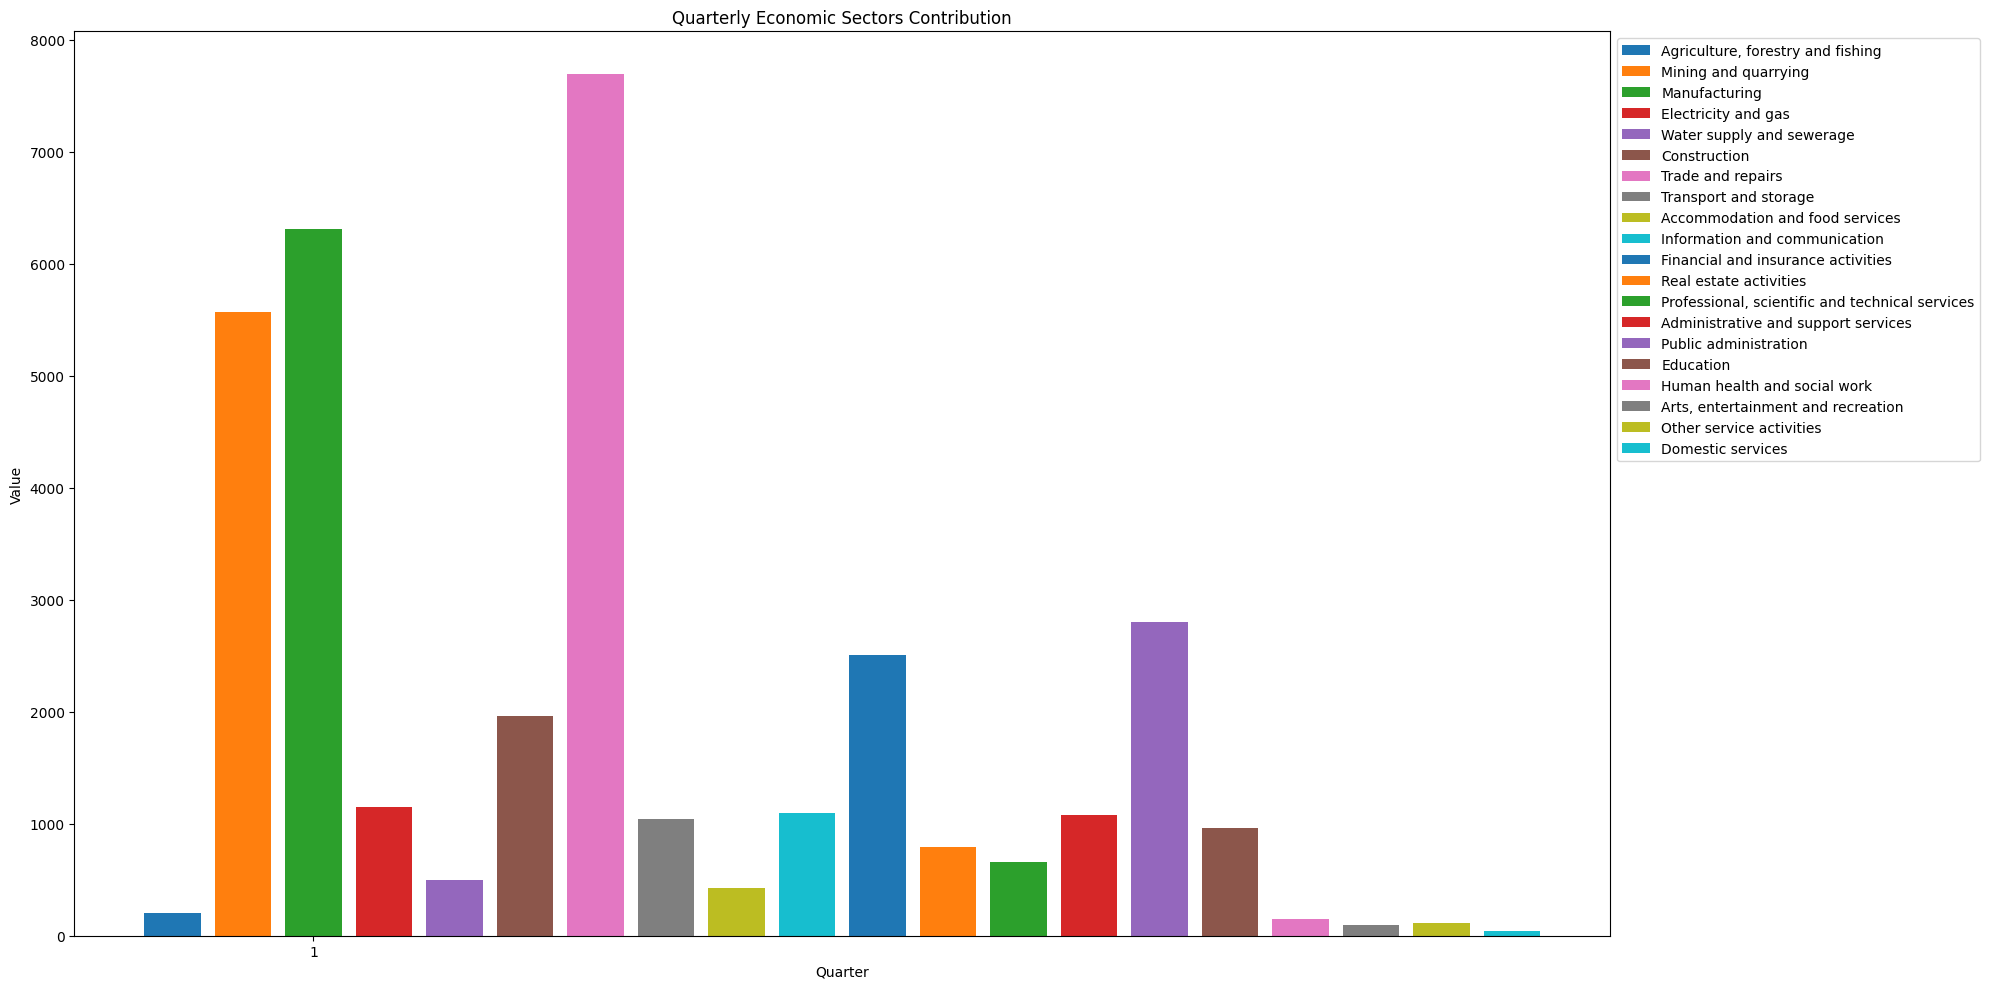

In [1718]:
plt.figure(figsize=(20, 10))

# Plot bars
for column in columns_to_plot:
    plt.bar(filtered_df_2022_Q1['Quarter'] + (columns_to_plot.index(column) - 2) * 0.15, filtered_df_2022_Q1[column], width=0.12, label=column)


plt.xlabel('Quarter')
plt.ylabel('Value')
plt.title('Quarterly Economic Sectors Contribution')
plt.xticks(filtered_df_2022_Q1['Quarter'])
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.tight_layout()
plt.show()

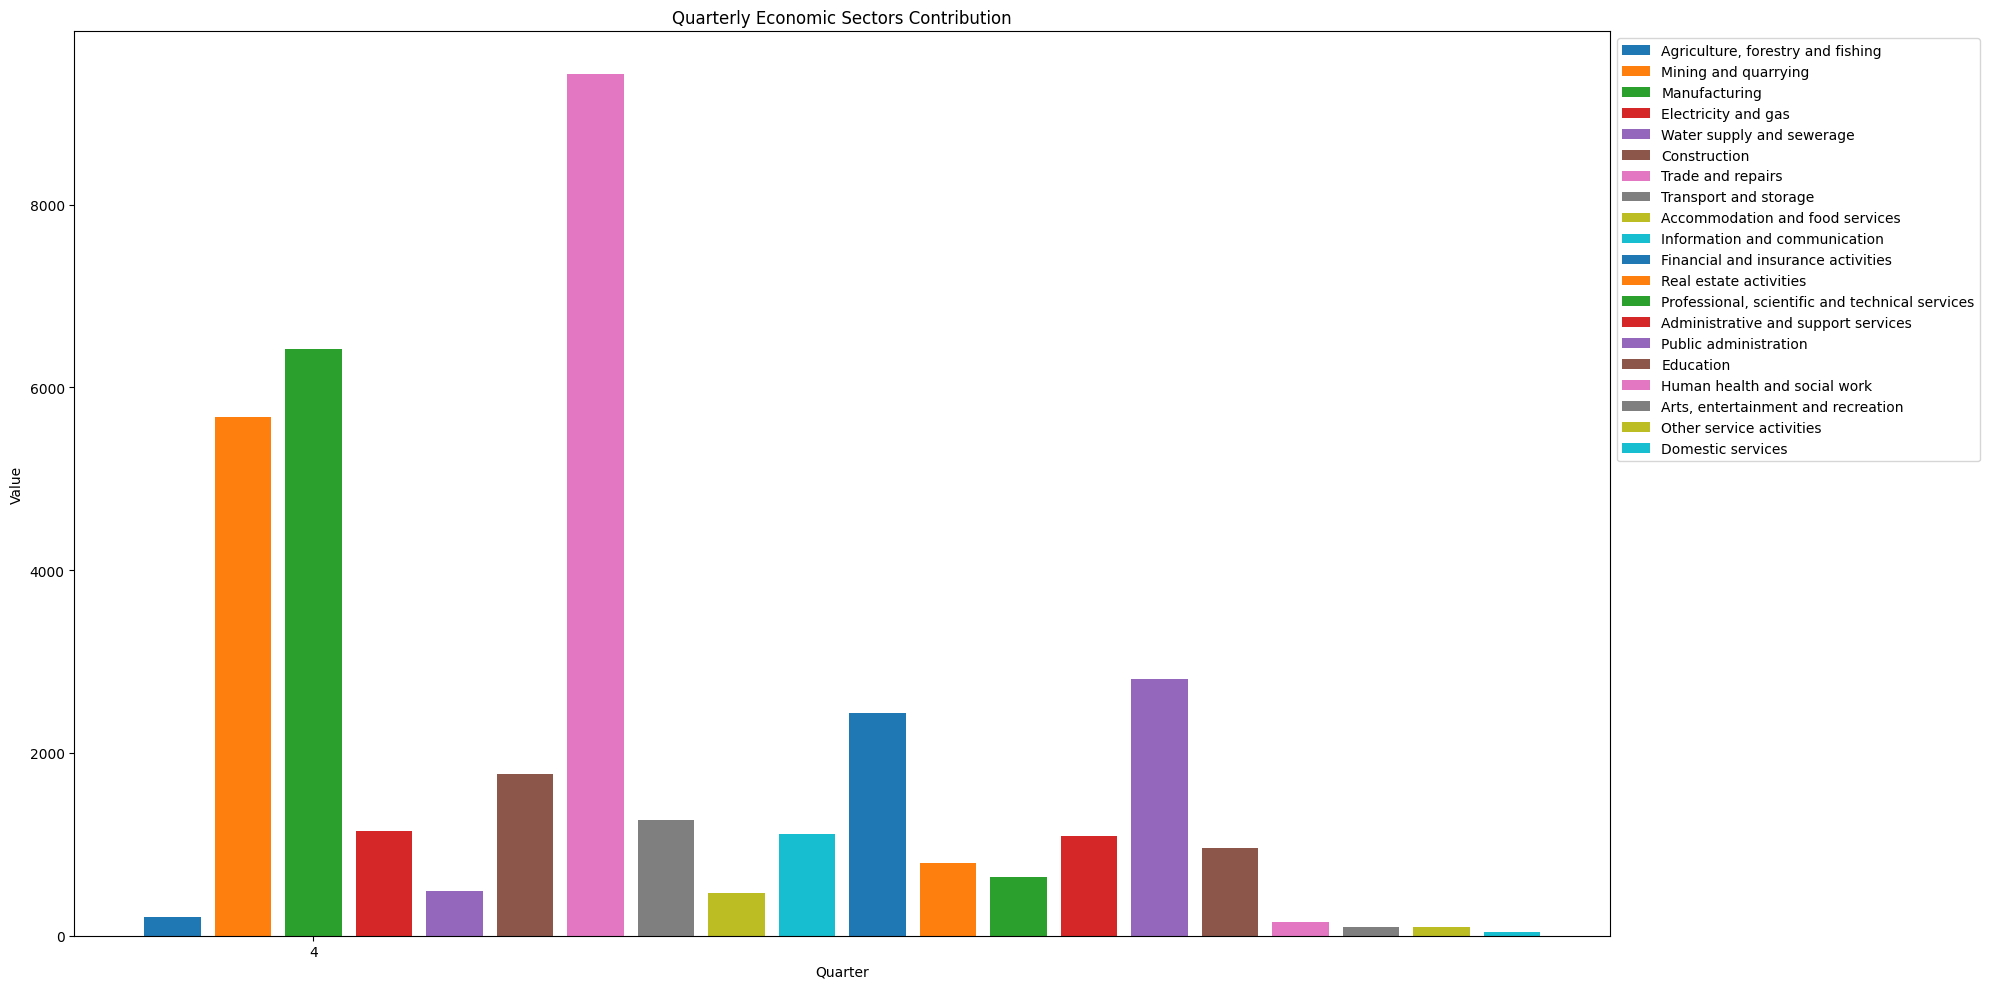

In [1719]:
plt.figure(figsize=(20, 10))

# Plot bars
for column in columns_to_plot:
    plt.bar(filtered_df_2022_Q4['Quarter'] + (columns_to_plot.index(column) - 2) * 0.15, filtered_df_2022_Q4[column], width=0.12, label=column)


plt.xlabel('Quarter')
plt.ylabel('Value')
plt.title('Quarterly Economic Sectors Contribution')
plt.xticks(filtered_df_2022_Q4['Quarter'])
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.tight_layout()
plt.show()

### Bar Chart Showing total gpd by year and quarter

In [1720]:

concat_frame = pd.concat([gdp_clean['Year'], gdp_clean['Quarter'], gdp_clean['Total GDP']], axis=1)

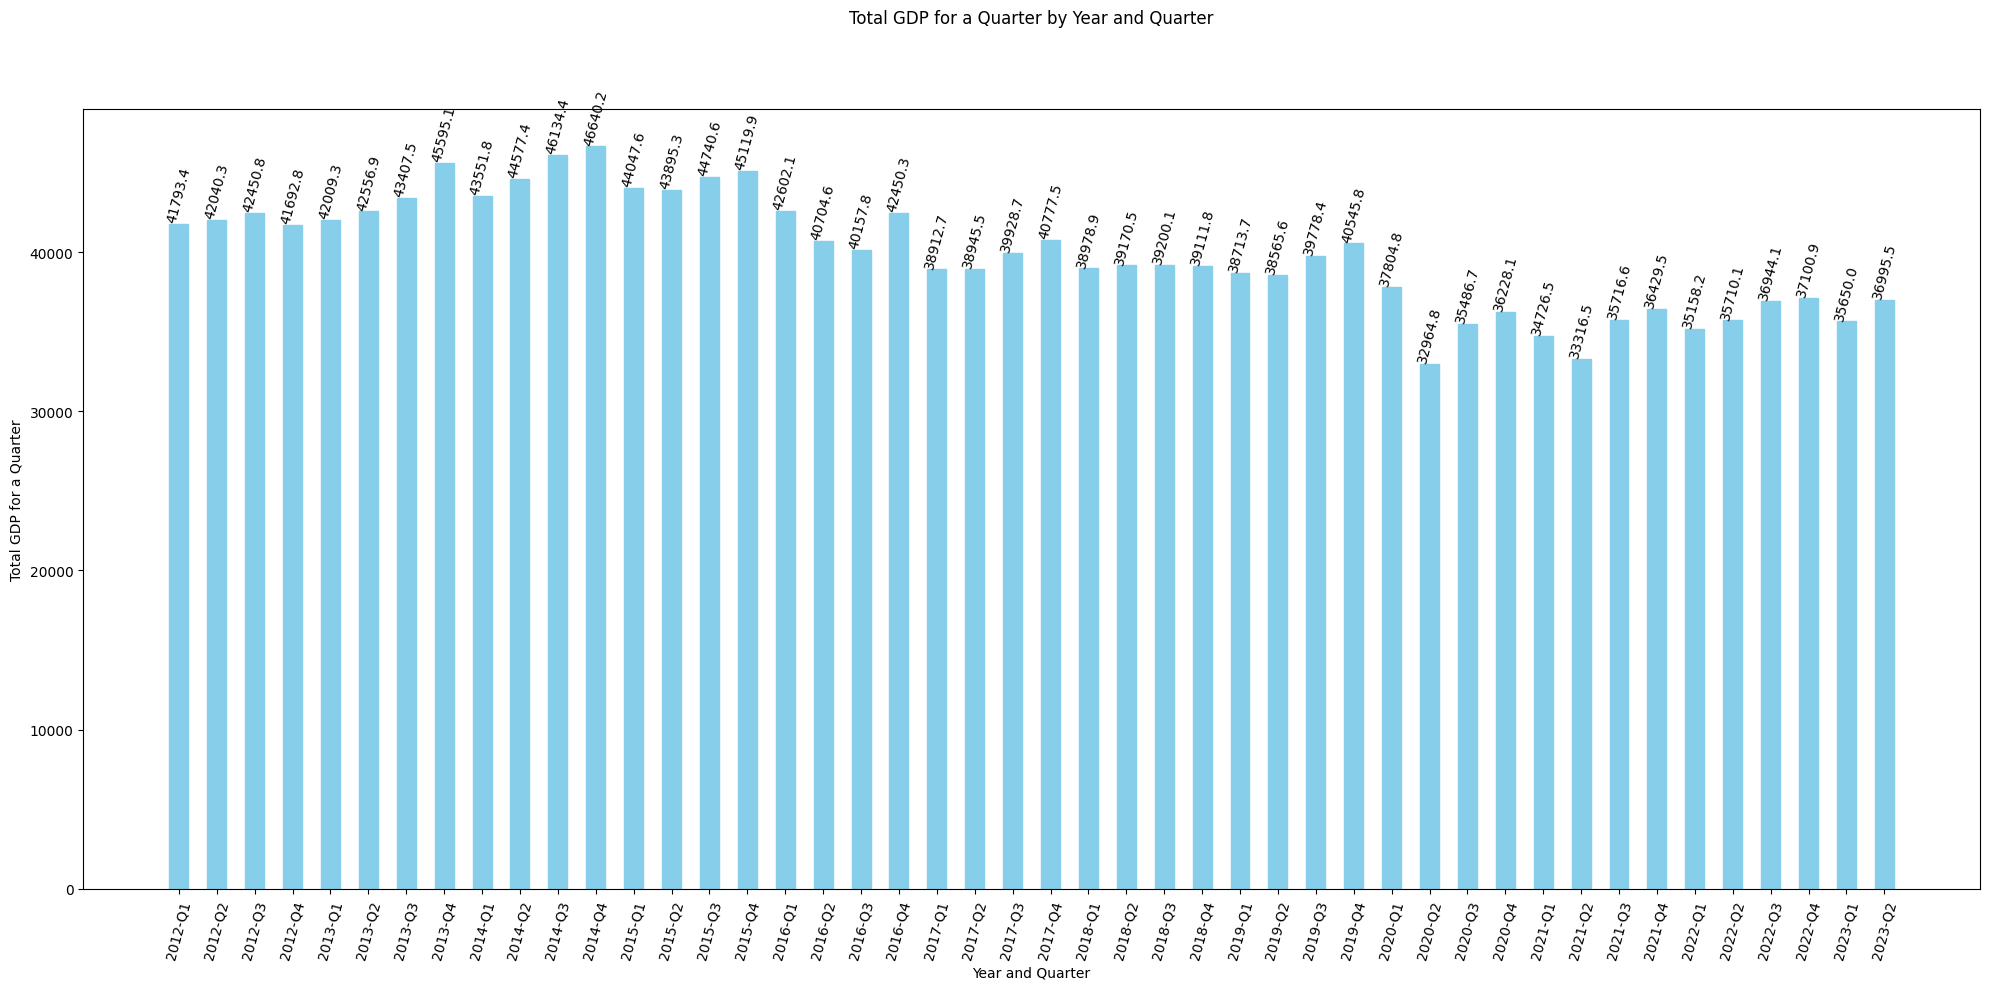

In [1721]:
concat_frame['Year_Quarter'] = gdp_clean['Year'].astype(str) + '-Q' + gdp_clean['Quarter'].astype(str)
yearly_gdp = concat_frame.groupby('Year_Quarter')['Total GDP'].sum()

gdp_by_year_quarter = pd.DataFrame({'Year_Quarter': yearly_gdp.index, 'Total_GDP': yearly_gdp.values})

plt.figure(figsize=(20, 10))
plt.bar(gdp_by_year_quarter['Year_Quarter'], gdp_by_year_quarter['Total_GDP'], color='skyblue', width = 0.5, edgecolor='skyblue')

for i in range(len(gdp_by_year_quarter)):
    plt.text(gdp_by_year_quarter['Year_Quarter'][i], gdp_by_year_quarter['Total_GDP'][i], str(gdp_by_year_quarter['Total_GDP'][i]), ha='center', va='bottom', rotation=75)

# Adding labels and title
plt.xlabel('Year and Quarter')
plt.ylabel('Total GDP for a Quarter')
plt.title('Total GDP for a Quarter by Year and Quarter', y = 1.1)

# Rotate x-axis labels for better readability
plt.xticks(rotation=75)
# Show plot
plt.tight_layout()
plt.show()

### Pie charts Showing Sectoral contributions for 2012 and 2022

In [1722]:
#get average gdp for 2012
filtered_df_2012_pie = gdp_clean[gdp_clean['Year'] == 2012]
mean_2012=filtered_df_2012_pie.mean()

total_gdp_2012 = mean_2012[22]
print(total_gdp_2012)

41994.325000000004


In [1723]:
numeric_values=[]
for col in mean_2012[2:22]:
    numeric_values.append(col)
print(numeric_values)

[285.775, 8841.425, 7633.549999999999, 1291.475, 514.275, 2152.425, 9950.0, 1341.5, 534.975, 964.5999999999999, 2331.925, 755.5, 592.45, 839.6500000000001, 2689.6000000000004, 910.175, 147.52499999999998, 94.425, 83.0, 40.05]


In [1724]:
gdp_percentages = [(value / total_gdp_2012) * 100 for value in numeric_values]
# gdp_percentages
for sector, percentage in zip(columns_to_plot, gdp_percentages):
    print(f"{sector}: {percentage:.2f}%")

Agriculture, forestry and fishing: 0.68%
Mining and quarrying: 21.05%
Manufacturing: 18.18%
Electricity and gas: 3.08%
Water supply and sewerage: 1.22%
Construction: 5.13%
Trade and repairs: 23.69%
Transport and storage: 3.19%
Accommodation and food services: 1.27%
Information and communication: 2.30%
Financial and insurance activities: 5.55%
Real estate activities: 1.80%
Professional, scientific and technical services: 1.41%
Administrative and support services: 2.00%
Public administration: 6.40%
Education: 2.17%
Human health and social work: 0.35%
Arts, entertainment and recreation: 0.22%
Other service activities: 0.20%
Domestic services: 0.10%


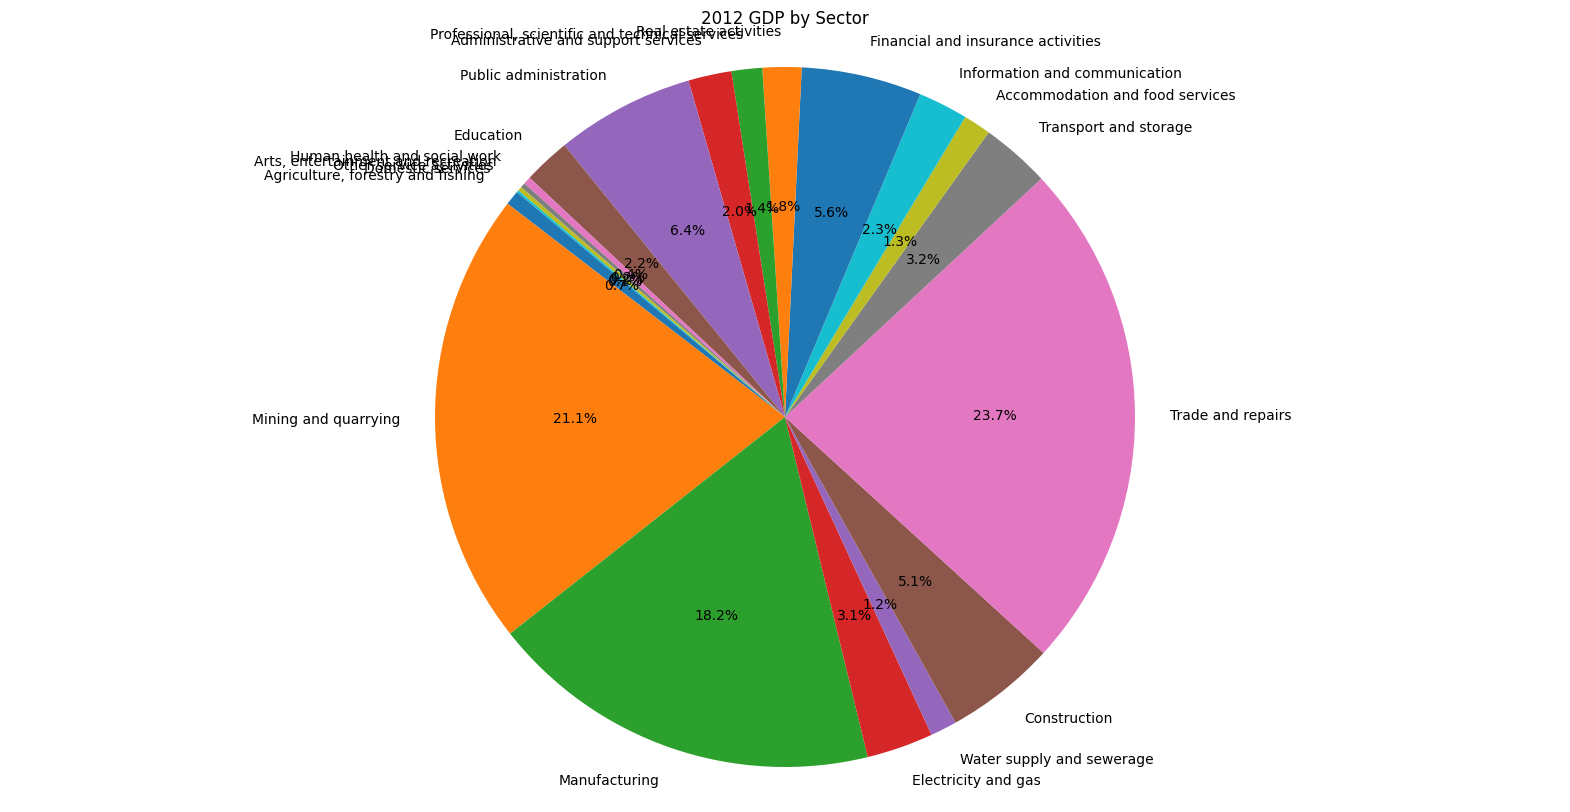

In [1725]:
# Create a pie chart
plt.figure(figsize=(20, 10))
plt.pie(gdp_percentages, labels = columns_to_plot, autopct='%1.1f%%', startangle=140)

# Add a title
plt.title('2012 GDP by Sector')
# plt.tight_layout(pad=3.0)
# Show the plot
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [1726]:
#get average gdp for 2022
filtered_df_2022_pie = gdp_clean[gdp_clean['Year'] == 2022]
mean_2022=filtered_df_2022_pie.mean()

total_gdp_2022 = mean_2022[22]
print(total_gdp_2022)

36228.325


In [1727]:
numeric_values=[]
for col in mean_2022[2:22]:
    numeric_values.append(col)
print(numeric_values)

[203.5, 5751.9, 6406.000000000001, 1148.525, 497.05, 1885.25, 8415.325, 1163.575, 466.0, 1105.875, 2457.575, 791.9, 664.7249999999999, 1088.975, 2832.625, 957.575, 149.825, 95.775, 101.5, 44.925]


In [1728]:
gdp_percentages = [(value / total_gdp_2022) * 100 for value in numeric_values]
# gdp_percentages
for sector, percentage in zip(columns_to_plot, gdp_percentages):
    print(f"{sector}: {percentage:.2f}%")

Agriculture, forestry and fishing: 0.56%
Mining and quarrying: 15.88%
Manufacturing: 17.68%
Electricity and gas: 3.17%
Water supply and sewerage: 1.37%
Construction: 5.20%
Trade and repairs: 23.23%
Transport and storage: 3.21%
Accommodation and food services: 1.29%
Information and communication: 3.05%
Financial and insurance activities: 6.78%
Real estate activities: 2.19%
Professional, scientific and technical services: 1.83%
Administrative and support services: 3.01%
Public administration: 7.82%
Education: 2.64%
Human health and social work: 0.41%
Arts, entertainment and recreation: 0.26%
Other service activities: 0.28%
Domestic services: 0.12%


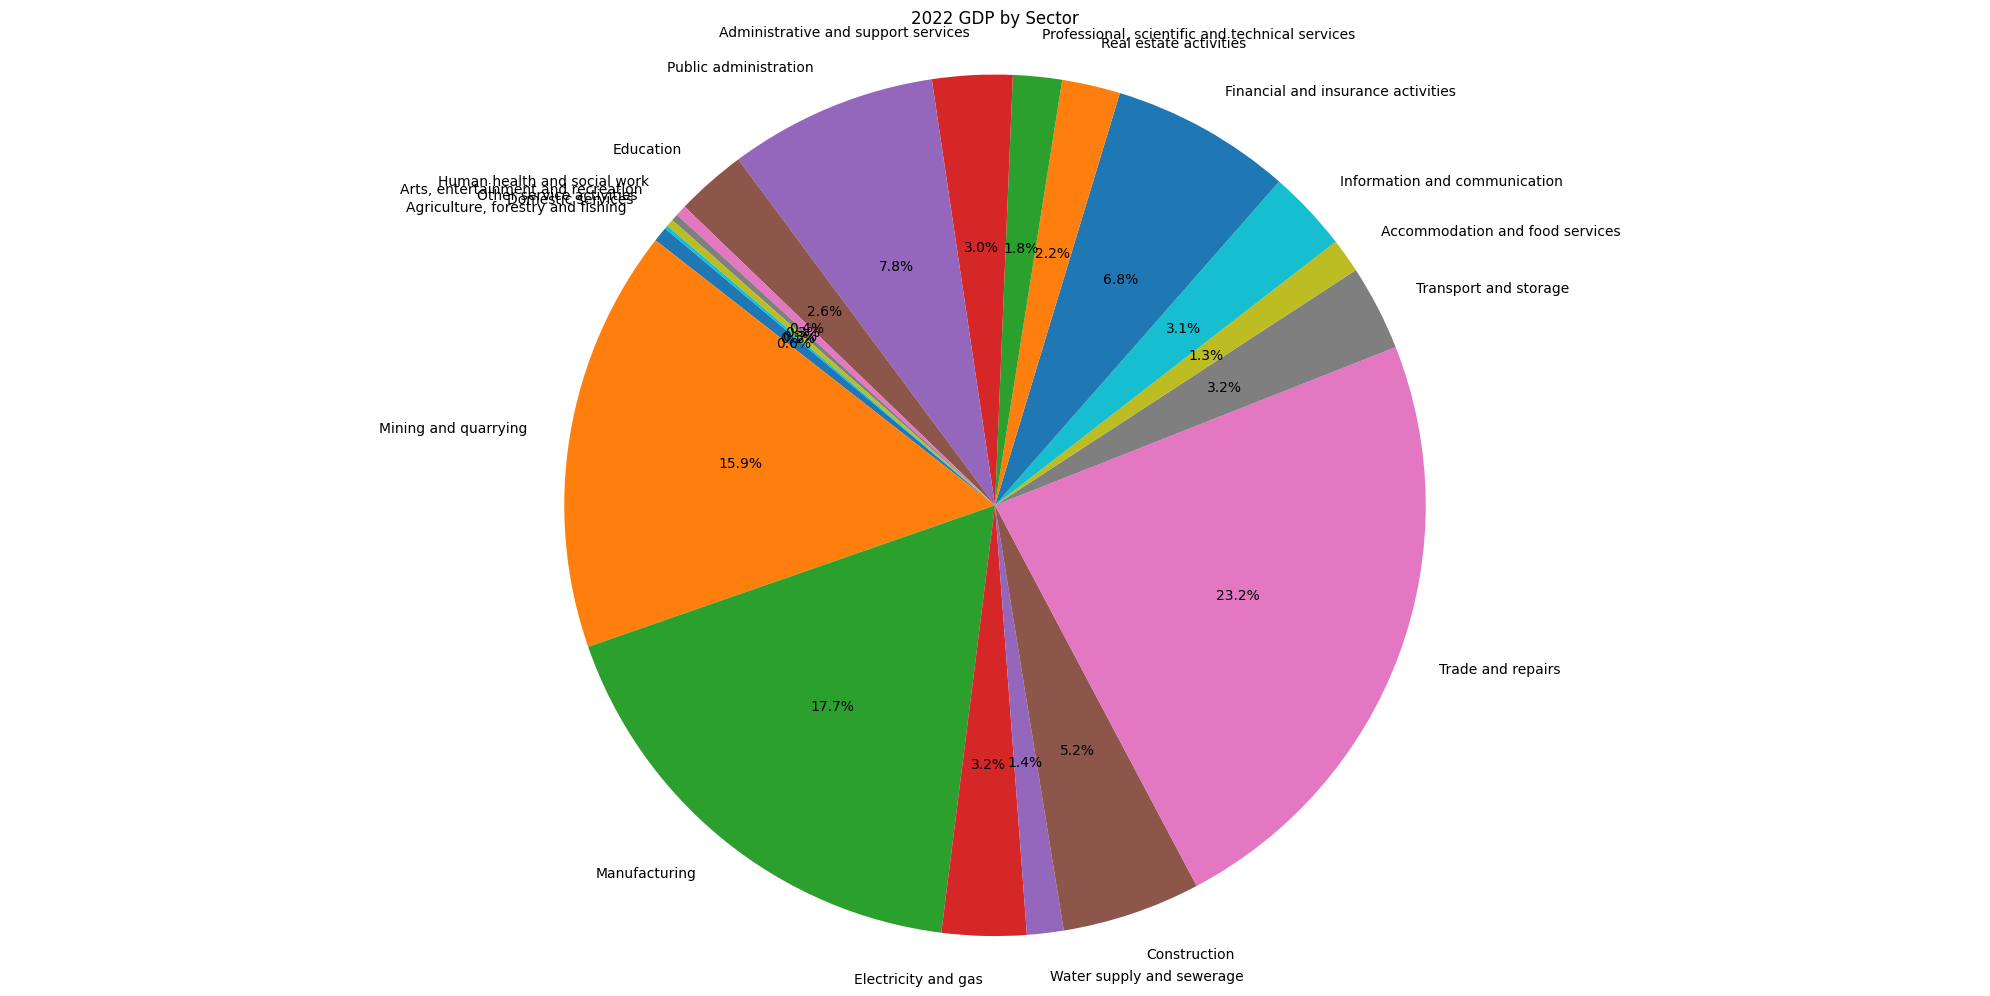

In [1729]:
# Create a pie chart
plt.figure(figsize=(20, 10))
plt.pie(gdp_percentages, labels = columns_to_plot, autopct='%1.1f%%', startangle=140)

# Add a title
plt.title('2022 GDP by Sector')
plt.tight_layout()
# Show the plot
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Based on the pie charts above Trade and repairs, Manufacturing and Mining and quarrying are the top 3 sectors

### Line chart showing contributions of top 3 sectors in the past 5 years

In [1730]:
#get values for the past 5 years
past_five_years = gdp_clean[gdp_clean['Year'] >= 2017]
columns=['Year','Quarter','Trade and repairs','Manufacturing','Mining and quarrying']
past_five_years[columns]


,Year,Quarter,Trade and repairs,Manufacturing,Mining and quarrying
20,2017,1,8790.4,6845.3,7560.7
21,2017,2,8836.8,6982.8,7262.8
22,2017,3,9089.9,7452.0,7597.7
23,2017,4,9944.1,7409.4,7427.3
24,2018,1,8124.4,7314.9,7546.3
25,2018,2,8574.5,7329.5,7259.0
26,2018,3,9147.5,7185.7,6968.4
27,2018,4,9915.1,6620.9,6816.6
28,2019,1,8822.4,7064.1,6953.3
29,2019,2,9072.1,6863.1,6738.2


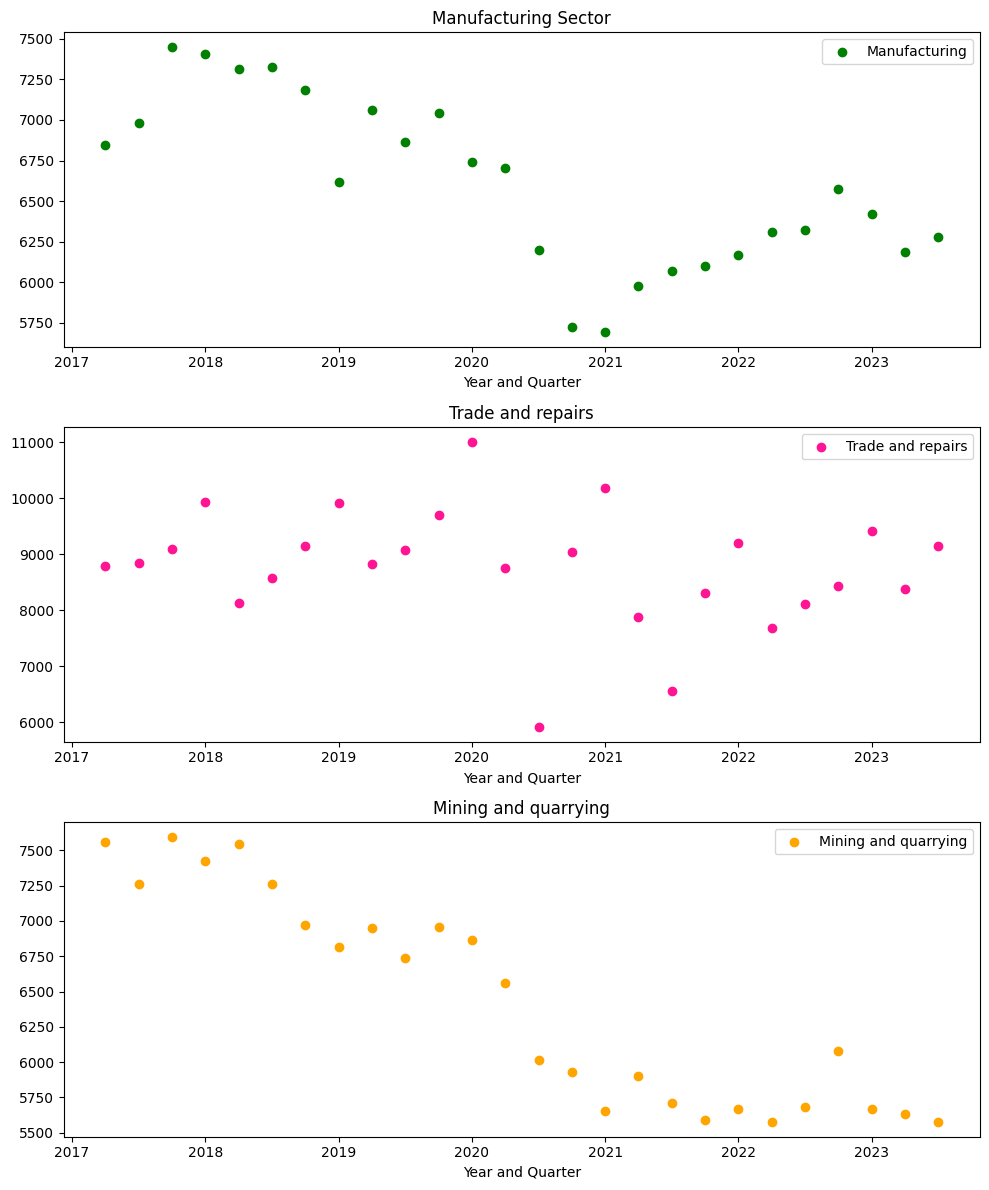

In [1731]:
# Plotting the scatter plot
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 12))

# Plotting the Manufacturing sector on the first subplot
ax1.scatter(past_five_years['Year'] + past_five_years['Quarter'] * 0.25, past_five_years['Manufacturing'], marker='o', color='green', label='Manufacturing')
ax1.set_title('Manufacturing Sector')
ax1.set_xlabel('Year and Quarter')
ax1.legend()

# Plotting the Trade and repairs sector on the second subplot
ax2.scatter(past_five_years['Year'] + past_five_years['Quarter'] * 0.25, past_five_years['Trade and repairs'], marker='o', color='#FF1493' , label='Trade and repairs')
ax2.set_title('Trade and repairs')
ax2.set_xlabel('Year and Quarter')
ax2.legend()

# Plotting the Mining and quarrying sector on the third subplot
ax3.scatter(past_five_years['Year'] + past_five_years['Quarter'] * 0.25, past_five_years['Mining and quarrying'], marker='o', color='orange', label='Mining and quarrying')
ax3.set_title('Mining and quarrying')
ax3.set_xlabel('Year and Quarter')
ax3.legend()


# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

## TSA

### Brent Oil prices in 2012

In [1732]:
brent_oil_df_2012 = brent_oil_df[brent_oil_df['Date'].dt.year == 2012]
brent_oil_df_2012


,Symbol,Date,Open,Close
3065,Brent Oil,2012-01-03,108.35,112.13
3066,Brent Oil,2012-01-04,112.10,113.70
3067,Brent Oil,2012-01-05,113.50,112.74
3068,Brent Oil,2012-01-06,112.85,113.06
3069,Brent Oil,2012-01-09,113.42,112.45
...,...,...,...,...
3318,Brent Oil,2012-12-24,109.02,108.80
3319,Brent Oil,2012-12-26,109.15,111.07
3320,Brent Oil,2012-12-27,110.78,110.80
3321,Brent Oil,2012-12-28,111.24,110.62


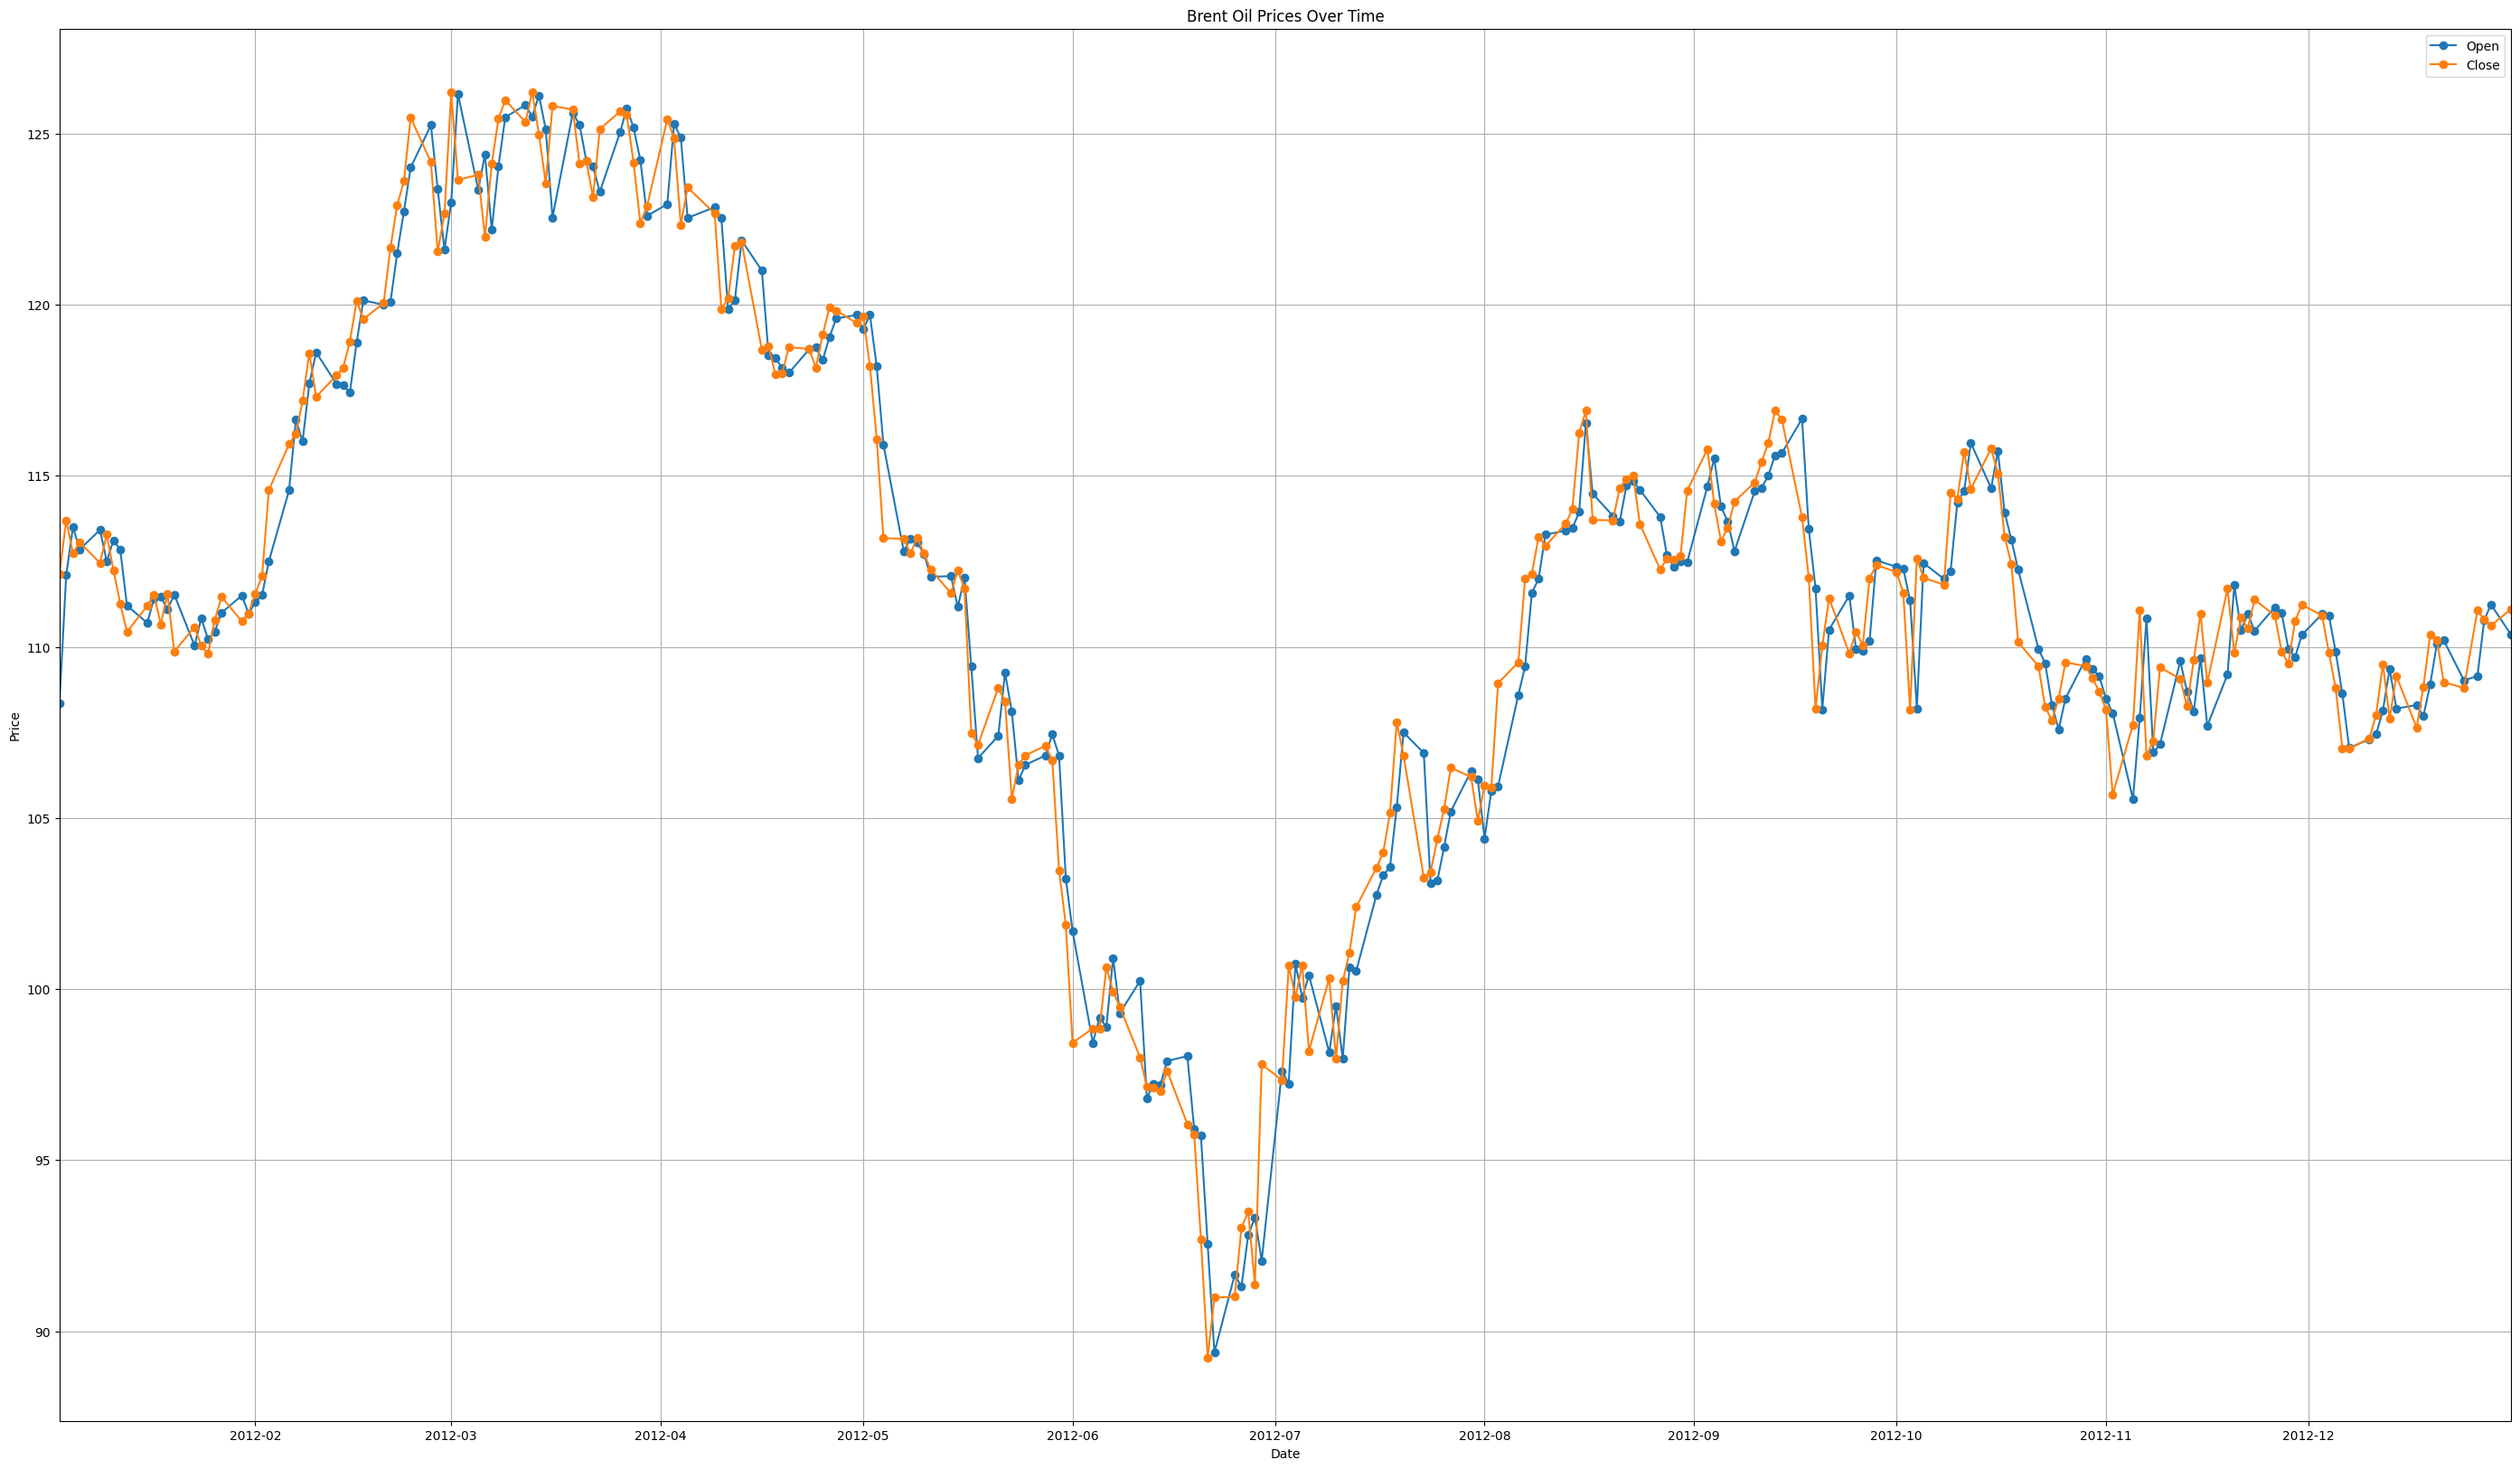

In [1733]:
# Plotting
plt.figure(figsize=(35,20))

# Plot Open and Close prices over time
plt.plot(brent_oil_df_2012['Date'], brent_oil_df_2012['Open'], marker='o', linestyle='-', label='Open')
plt.plot(brent_oil_df_2012['Date'], brent_oil_df_2012['Close'], marker='o', linestyle='-', label='Close')

plt.title('Brent Oil Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.xlim(brent_oil_df_2012['Date'].iloc[0], brent_oil_df_2012['Date'].iloc[-1])  # Set limits from first date to last date in the dataset
plt.show()

### Brent Oil, Crude Oil and Natural Gas Prices for all years

In [1734]:
# Get the unique dates present in each DataFrame
dates_brent_oil = set(brent_oil_df['Date'])
dates_crude_oil = set(crude_oil_df['Date'])
dates_natural_gas = set(natural_gas_df['Date'])
dates_heating_oil= set(heating_oil_df['Date'])

# Find the intersection of dates present in all three DataFrames
common_dates = dates_brent_oil.intersection(dates_crude_oil, dates_natural_gas,dates_heating_oil)

# Filter rows in each DataFrame to include only the common dates
brent_oil_filtered = brent_oil_df[brent_oil_df['Date'].isin(common_dates)]
crude_oil_filtered = crude_oil_df[crude_oil_df['Date'].isin(common_dates)]
natural_gas_filtered = natural_gas_df[natural_gas_df['Date'].isin(common_dates)]
heating_oil_filtered = heating_oil_df[heating_oil_df['Date'].isin(common_dates)]

# Merge the filtered DataFrames on the 'Date' column
merged_df = pd.merge(brent_oil_filtered, crude_oil_filtered, on='Date', how='inner')
merged_df = pd.merge(merged_df, natural_gas_filtered, on='Date', how='inner')
merged_df= pd.merge(merged_df, heating_oil_filtered, on='Date', how='inner', suffixes=('_gas', '_heating'))
merged_df


,Symbol_x,Date,Open_x,Close_x,Symbol_y,Open_y,Close_y,Symbol_gas,Open_gas,Close_gas,Symbol_heating,Open_heating,Close_heating
0,Brent Oil,2000-01-04,23.90,24.39,Crude Oil WTI,25.20,25.55,Natural Gas,2.130,2.176,Heating Oil,0.6720,0.6778
1,Brent Oil,2000-01-05,24.25,23.73,Crude Oil WTI,25.50,24.91,Natural Gas,2.180,2.168,Heating Oil,0.6790,0.6655
2,Brent Oil,2000-01-06,23.55,23.62,Crude Oil WTI,24.80,24.78,Natural Gas,2.165,2.196,Heating Oil,0.6645,0.6628
3,Brent Oil,2000-01-07,23.57,23.09,Crude Oil WTI,24.65,24.22,Natural Gas,2.195,2.173,Heating Oil,0.6600,0.6475
4,Brent Oil,2000-01-10,23.04,23.73,Crude Oil WTI,24.22,24.67,Natural Gas,2.180,2.216,Heating Oil,0.6445,0.6472
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5668,Brent Oil,2022-06-13,121.94,122.27,Crude Oil WTI,120.19,120.93,Natural Gas,8.920,8.609,Heating Oil,4.3612,4.2834
5669,Brent Oil,2022-06-14,121.88,121.17,Crude Oil WTI,121.09,118.93,Natural Gas,8.686,7.189,Heating Oil,4.2749,4.3940
5670,Brent Oil,2022-06-15,120.79,118.51,Crude Oil WTI,119.07,115.31,Natural Gas,7.269,7.420,Heating Oil,4.3816,4.5470
5671,Brent Oil,2022-06-16,119.65,119.81,Crude Oil WTI,115.98,117.59,Natural Gas,7.540,7.464,Heating Oil,4.5320,4.5713


In [1735]:
open_only = merged_df[['Date', 'Open_x', 'Open_y', 'Open_gas','Open_heating']]
open_only.columns = ['Date', 'OpeBrent Oil', 'Crude Oil WTI', 'Natural Gas','Heating Oil']


In [1736]:
open_only.set_index('Date', inplace = True)

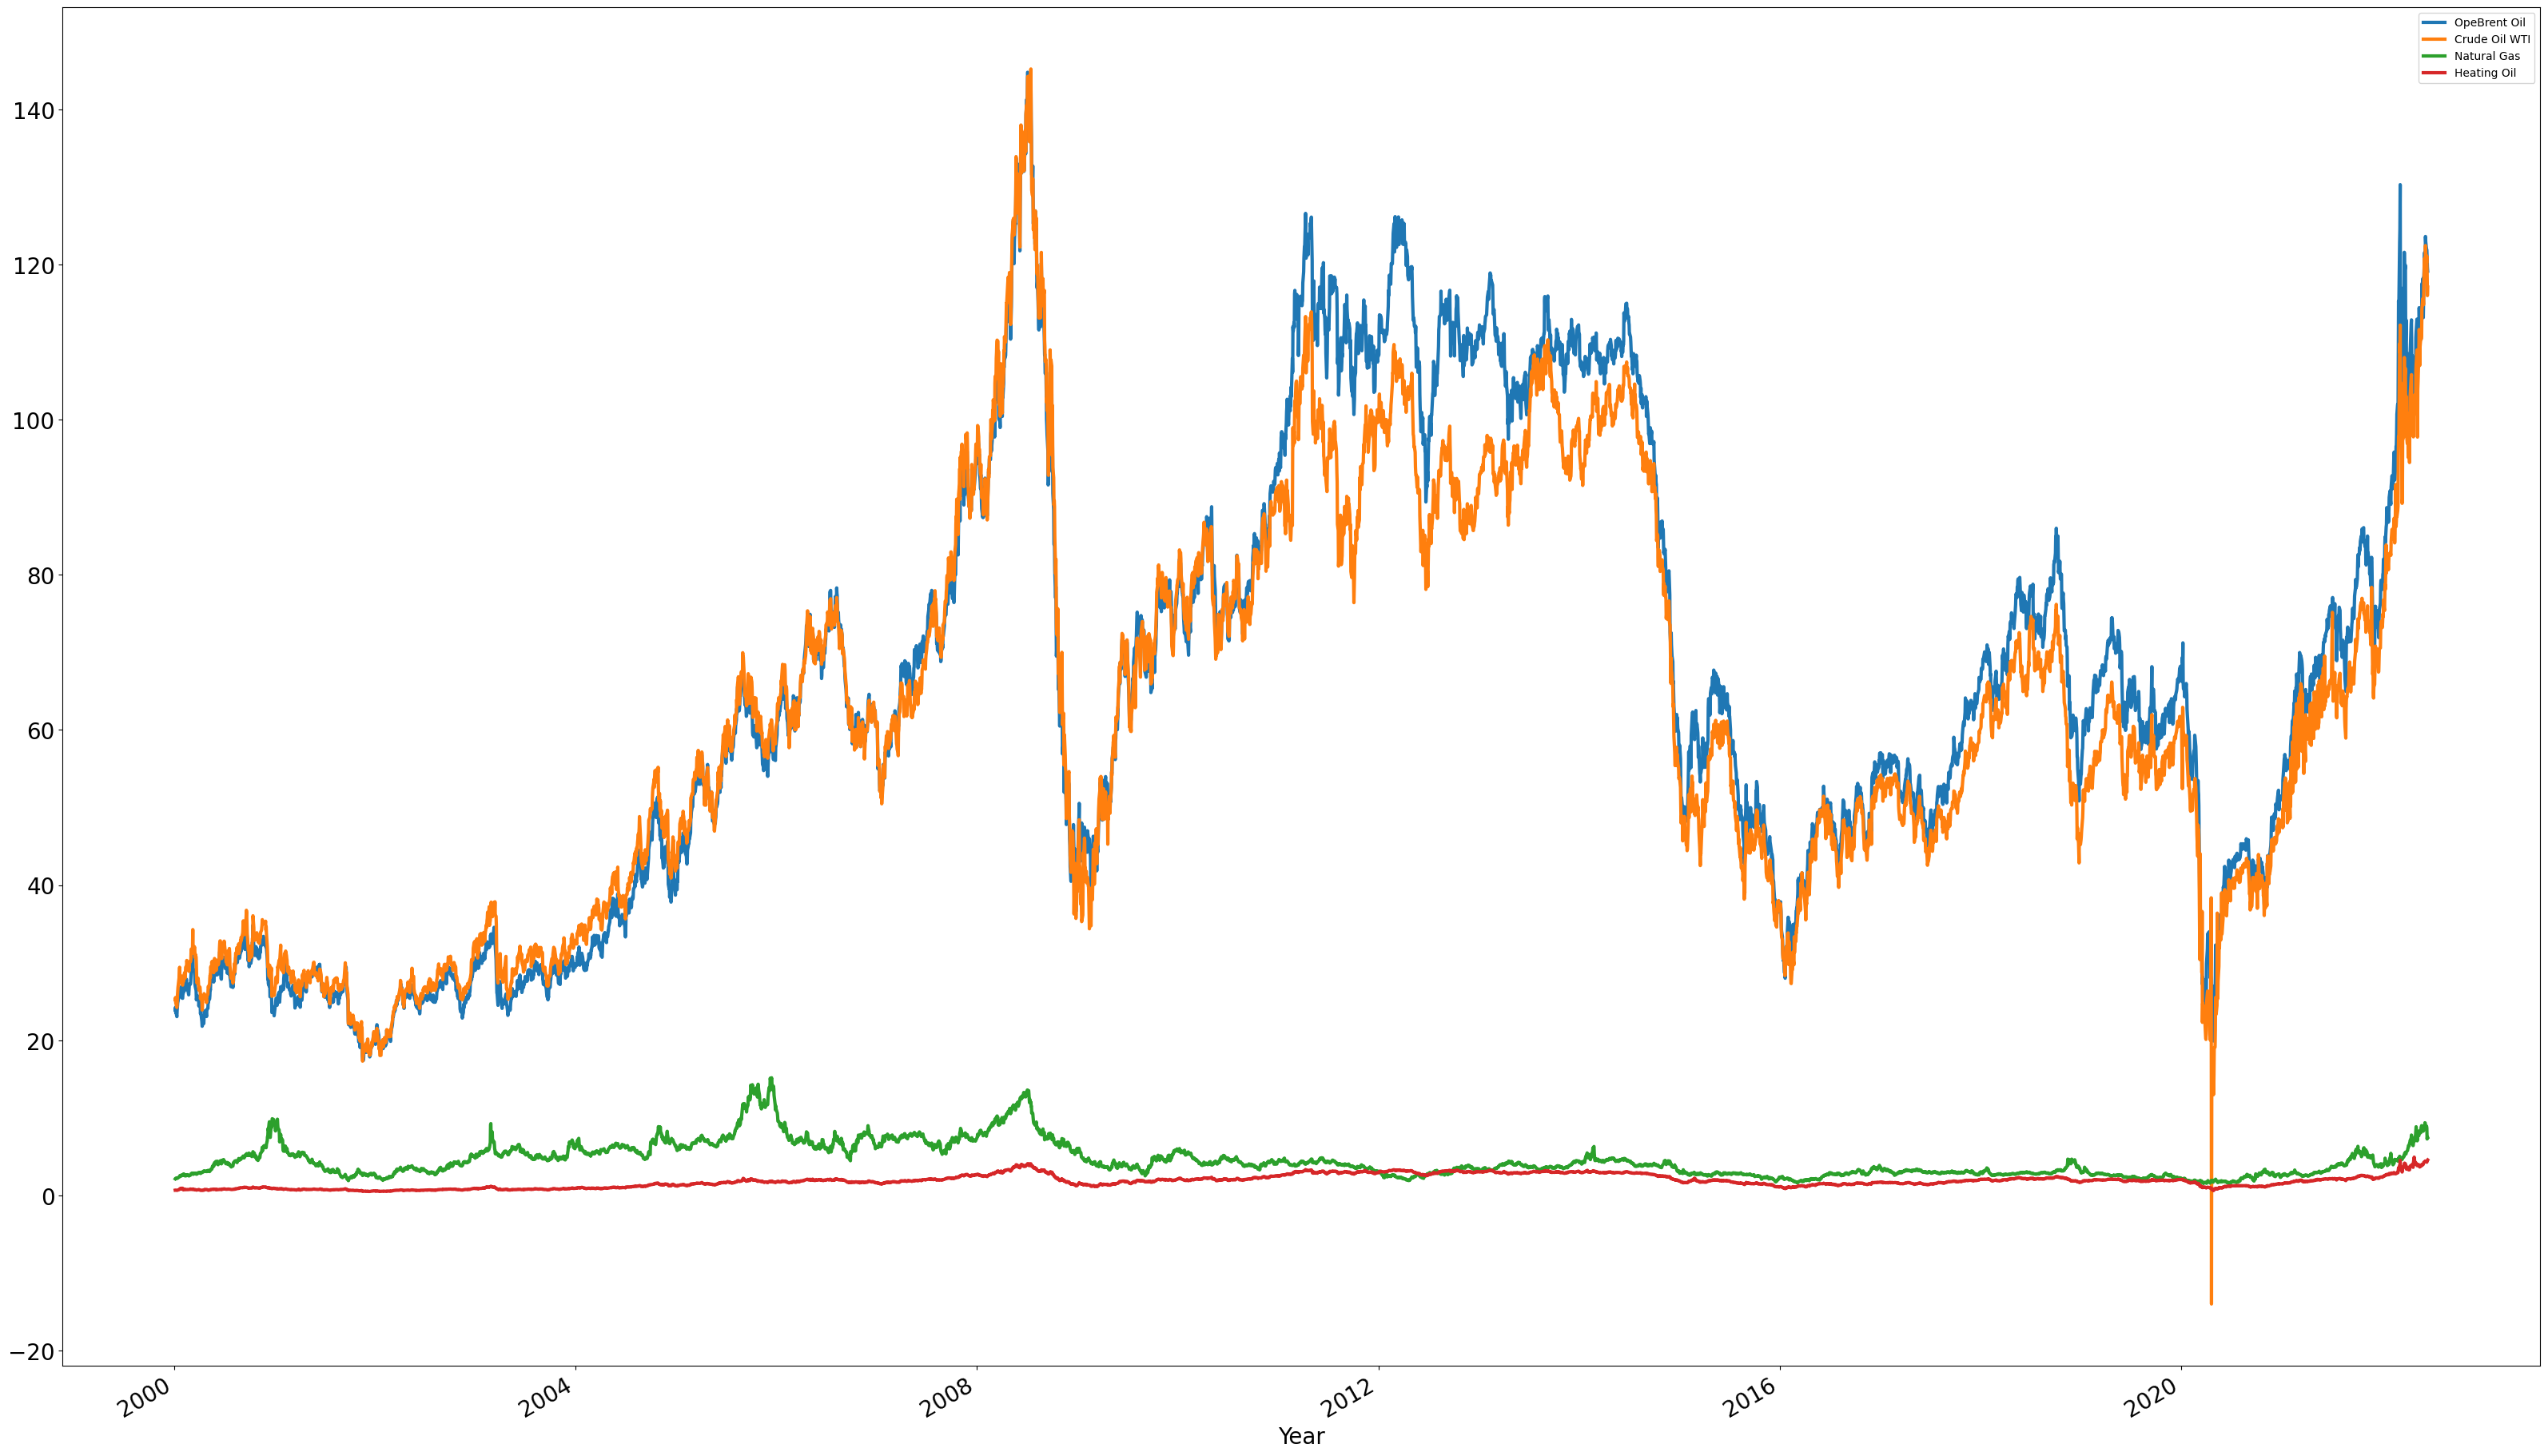

In [1737]:
open_only.plot(figsize = (40,25), linewidth = 3, fontsize = 20)
plt.xlabel('Year', fontsize = 20);

### 2022 TSA

In [1738]:
dates_2022 = merged_df['Date'].dt.year == 2022
merged_df_2022 = merged_df[dates_2022]
open_only_2022 = merged_df_2022[['Date', 'Open_x', 'Open_y', 'Open_gas','Open_heating']]
open_only_2022.columns = ['Date', 'Brent Oil', 'Crude Oil WTI', 'Natural Gas','Heating Oil']
open_only_2022

,Date,Brent Oil,Crude Oil WTI,Natural Gas,Heating Oil
5554,2022-01-03,78.11,73.20,3.702,2.3283
5555,2022-01-04,78.91,73.88,3.817,2.3607
5556,2022-01-05,80.07,74.91,3.747,2.4114
5557,2022-01-06,80.22,74.57,3.842,2.4282
5558,2022-01-07,82.00,76.74,3.860,2.4790
...,...,...,...,...,...
5668,2022-06-13,121.94,120.19,8.920,4.3612
5669,2022-06-14,121.88,121.09,8.686,4.2749
5670,2022-06-15,120.79,119.07,7.269,4.3816
5671,2022-06-16,119.65,115.98,7.540,4.5320


In [1739]:
open_only_2022.set_index('Date', inplace = True)

Text(0.5, 0, 'Year')

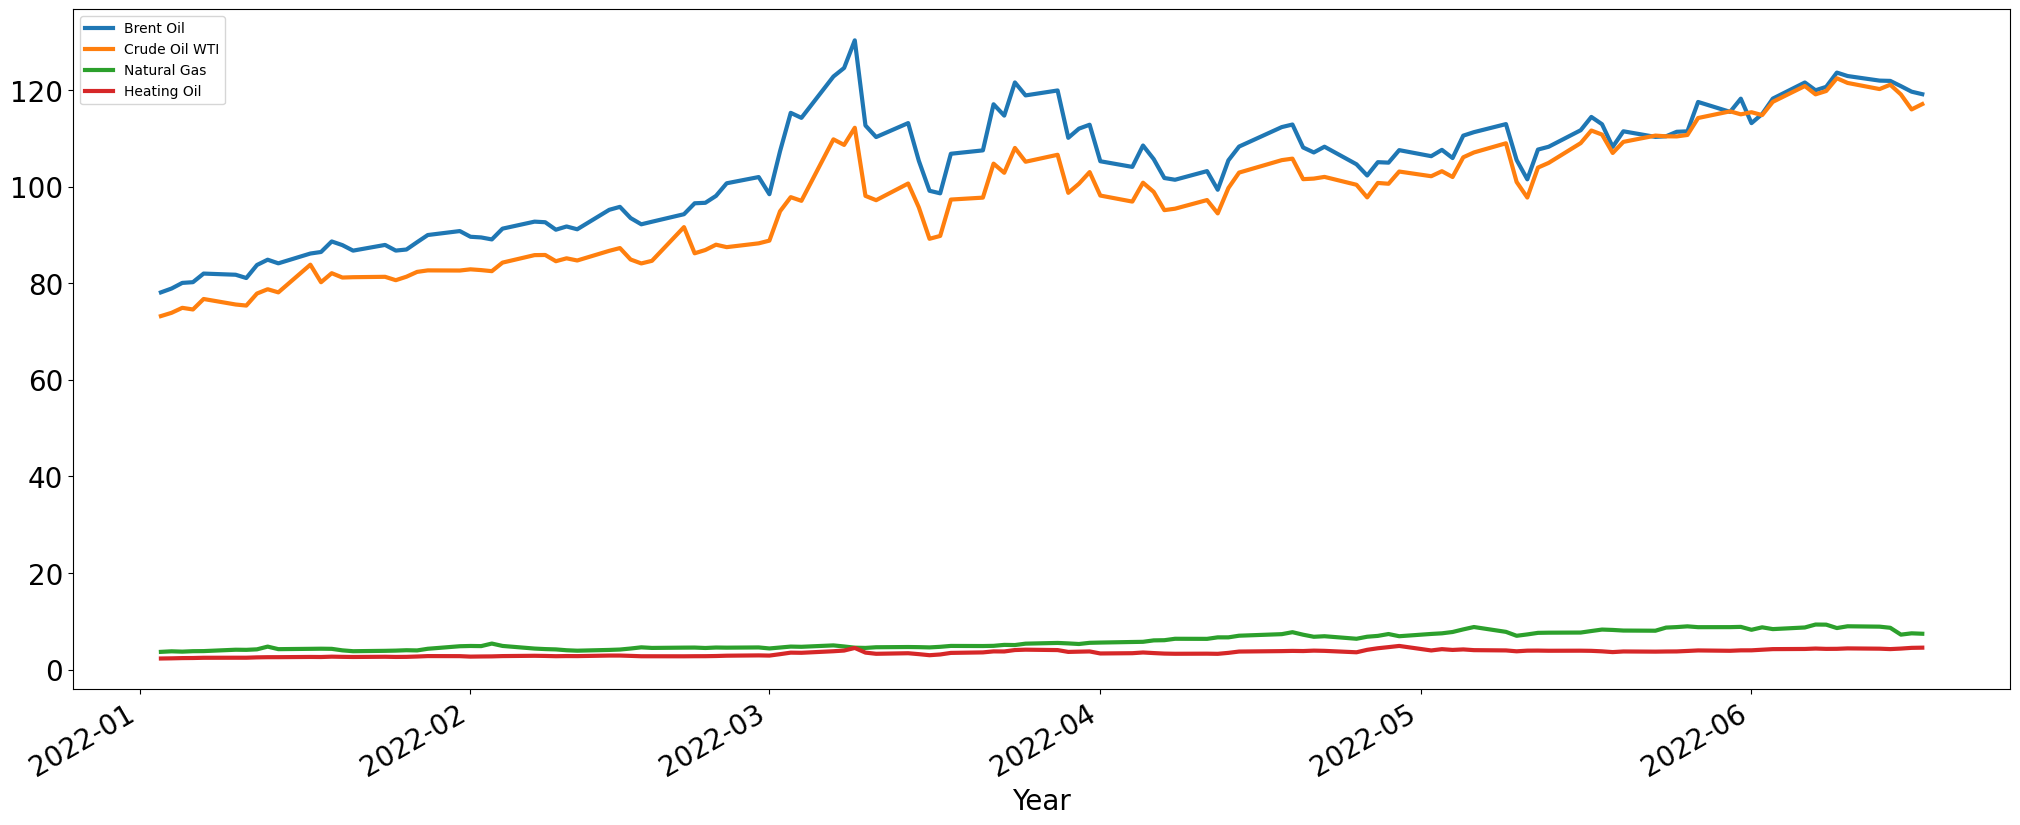

In [1740]:
open_only_2022.plot(figsize = (25,10), linewidth = 3, fontsize = 20)
plt.xlabel('Year', fontsize = 20)

##correlation matrix for oil & gas prices and gdp


##Merging the oil gas and gdp data

In [1741]:
# group oil and gas df by quarters in the year and assign the average to each quarter

#grouping filtered data set

# quarter_df_natural = natural_gas_filtered.groupby(natural_gas_filtered['Date'].dt.to_period('Q'))['Open'].mean()
# quarter_df_heating = heating_oil_filtered.groupby(heating_oil_filtered['Date'].dt.to_period('Q'))['Open'].mean()
# quarter_df_crude = crude_oil_filtered.groupby(crude_oil_filtered['Date'].dt.to_period('Q'))['Open'].mean()
# quarter_df_brent = brent_oil_filtered.groupby(brent_oil_filtered['Date'].dt.to_period('Q'))['Open'].mean()



quarter_df_natural = (natural_gas_filtered.groupby(natural_gas_filtered['Date'].dt.to_period('Q'))
                      ['Open'].mean().reset_index())
quarter_df_heating = (heating_oil_filtered.groupby(heating_oil_filtered['Date'].dt.to_period('Q'))
                      ['Open'].mean().reset_index())
quarter_df_crude = (crude_oil_filtered.groupby(crude_oil_filtered['Date'].dt.to_period('Q'))
                    ['Open'].mean().reset_index())
quarter_df_brent = (brent_oil_filtered.groupby(brent_oil_filtered['Date'].dt.to_period('Q'))
                    ['Open'].mean().reset_index())



#merging quarter data set with common quarters in GDP



In [1742]:
#merging all filtered sets



# Merge the filtered DataFrames on the 'Date' column
merged_df = pd.merge(quarter_df_natural,  quarter_df_heating, on='Date', how='inner')
merged_df = pd.merge(merged_df, quarter_df_crude, on='Date', how='inner')
merged_df= pd.merge(merged_df, quarter_df_brent, on='Date', how='inner', suffixes=('_gas', '_heating'))
merged_df





,Date,Open_x,Open_y,Open_gas,Open_heating
0,2000Q1,2.609242,0.757515,28.715645,26.498871
1,2000Q2,3.666967,0.738872,28.691639,26.868033
2,2000Q3,4.513607,0.885374,31.499836,30.341967
3,2000Q4,6.342984,0.978561,31.984918,30.130656
4,2001Q1,6.317516,0.784535,28.658226,26.270645
...,...,...,...,...,...
85,2021Q2,2.964703,1.998048,63.175000,68.880781
86,2021Q3,4.282955,2.129377,65.662121,73.093333
87,2021Q4,4.880692,2.377348,72.542769,79.717077
88,2022Q1,4.532750,3.039908,88.711875,97.681875


In [1743]:
#puting the dates into the old data table
dates=pd.DataFrame(gdp_df[0])

dates = dates.iloc[2:]
dates.reset_index(inplace=True)
dates.rename(columns={'index': 'Date'}, inplace=True)

dates.head()

,Date,0
0,2012-1,NaN
1,2012-2,NaN
2,2012-3,NaN
3,2012-4,NaN
4,2013-1,NaN


In [1744]:
#changing format of grouped dates from Q's to -
merged_df['Date'] = merged_df['Date'].astype(str)


merged_df['Date'] = merged_df['Date'].str.replace('Q', '-')
merged_df.info()

quarterly_gdp = gdp_clean.drop('Year', axis=1)
quarterly_gdp= quarterly_gdp.drop('Quarter',axis=1)
quarterly_gdp = quarterly_gdp.assign(Date=dates['Date'])

# quarterly_gdp.head()

# dates.head()

#merging with gdp now

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          90 non-null     object 
 1   Open_x        90 non-null     float64
 2   Open_y        90 non-null     float64
 3   Open_gas      90 non-null     float64
 4   Open_heating  90 non-null     float64
dtypes: float64(4), object(1)
memory usage: 3.6+ KB


In [1747]:
merged_df = pd.merge(merged_df, quarterly_gdp, on='Date', how='left')
merged_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 47 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Date                                               90 non-null     object 
 1   Open_x                                             90 non-null     float64
 2   Open_y                                             90 non-null     float64
 3   Open_gas                                           90 non-null     float64
 4   Open_heating                                       90 non-null     float64
 5   Agriculture, forestry and fishing_x                42 non-null     float64
 6   Mining and quarrying_x                             42 non-null     float64
 7   Manufacturing_x                                    42 non-null     float64
 8   Electricity and gas_x                              42 non-null     float64
 9   Water supply

In [1749]:
#droping nan values
merged_df.dropna(inplace=True)
merged_df.head()



,Date,Open_x,Open_y,Open_gas,Open_heating,"Agriculture, forestry and fishing_x",Mining and quarrying_x,Manufacturing_x,Electricity and gas_x,Water supply and sewerage_x,...,Real estate activities_y,"Professional, scientific and technical services_y",Administrative and support services_y,Public administration_y,Education_y,Human health and social work_y,"Arts, entertainment and recreation_y",Other service activities_y,Domestic services_y,Total GDP_y
48,2012-1,2.516226,3.159355,103.100484,118.364839,289.5,9212.6,7888.0,1309.3,512.3,...,753.3,604.0,779.6,2687.4,903.4,147.4,94.4,80.5,39.8,41793.4
49,2012-2,2.347825,2.901737,93.628571,109.126667,282.1,8893.6,7847.7,1299.3,509.3,...,754.7,544.2,801.2,2682.8,905.4,147.1,94.1,83.2,40.0,42040.3
50,2012-3,2.892746,2.994471,92.081746,109.104286,284.0,8773.2,7768.4,1327.9,513.2,...,756.6,602.5,856.3,2701.3,914.3,147.9,94.7,82.9,40.1,42450.8
51,2012-4,3.547281,3.056977,88.229844,110.062813,287.5,8486.3,7030.1,1229.4,522.3,...,757.4,619.1,921.5,2686.9,917.6,147.7,94.5,85.4,40.3,41692.8
52,2013-1,3.473267,3.045040,94.274833,112.514500,279.9,9024.4,7692.1,1329.9,485.1,...,760.1,446.9,1020.8,2658.4,924.4,148.0,94.7,87.0,40.4,42009.3


# Line Chart for Oil/Gas type with Highest Correlation to GDP

In [1746]:
xdates_2022 = merged_df['Date'].dt.year == 2022
merged_df_2022 = merged_df[dates_2022]
open_only_2022 = merged_df_2022[['Date', 'Open_x', 'Open_y', 'Open']]
open_only_2022.columns = ['Date', 'Brent Oil', 'Crude Oil WTI', 'Natural Gas']
open_only_2022

AttributeError: Can only use .dt accessor with datetimelike values

In [ ]:
gdp_clean_2022 = gdp_clean[gdp_clean['Year'] == 2022]
gdp_clean_2022

In [ ]:
dates_2022 = merged_df['Date'].dt.year == 2022
merged_df_2022 = merged_df[dates_2022]

result = pd.concat([merged_df_2022, gdp_clean_2022], axis=1, join="outer")
#open_only_2022 = merged_df_2022[['Date', 'Open_x', 'Open_y', 'Open']]
#open_only_2022.columns = ['Date', 'Brent Oil', 'Crude Oil WTI', 'Natural Gas']
#open_only_2022

result.head(500)